#### clone repo

In [ ]:
!git clone https://github.com/matthewsparr/grid-by-daylight
%cd grid-by-daylight

fatal: destination path 'grid-by-daylight' already exists and is not an empty directory.
/content/grid-by-daylight


#### install vulkan

In [ ]:
!wget -qO - http://packages.lunarg.com/lunarg-signing-key-pub.asc | sudo apt-key add -
!sudo wget -qO /etc/apt/sources.list.d/lunarg-vulkan-bionic.list http://packages.lunarg.com/vulkan/lunarg-vulkan-bionic.list
!sudo apt update
!sudo apt install vulkan-sdk

OK
Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:9 http://ppa.launchpad.net/jonathonf/ffmpeg-4/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x

#### install ffmpeg

In [ ]:
#@title <font size="5">← ឵឵<i>Upgrade FFmpeg to v4.2.2</font> { vertical-output: true }
from IPython.display import clear_output
import os, urllib.request
HOME = os.path.expanduser("~")
pathDoneCMD = f'{HOME}/doneCMD.sh'
if not os.path.exists(f"{HOME}/.ipython/ttmg.py"):
    hCode = "https://raw.githubusercontent.com/yunooooo/gcct/master/res/ttmg.py"
    urllib.request.urlretrieve(hCode, f"{HOME}/.ipython/ttmg.py")

from ttmg import (
    loadingAn,
    textAn,
)

loadingAn(name="lds")
textAn("Installing Dependencies...", ty='twg')
os.system('pip install git+git://github.com/AWConant/jikanpy.git')
os.system('add-apt-repository -y ppa:jonathonf/ffmpeg-4')
os.system('apt-get update')
os.system('apt install mediainfo')
os.system('apt-get install ffmpeg')
clear_output()
print('Installation finished.')

Installation finished.


#### install requirements

In [ ]:
!pip install tdqm

In [ ]:
!pip install -r requirements.txt

  Using cached matplotlib-3.4.2-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.2
    Uninstalling matplotlib-3.4.2:
      Successfully uninstalled matplotlib-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%ls

 bear_trap_armed.png         training-new-map-208.mp4
'Bear_Trap - Copy (2).png'   training-new-map-209.mp4
 bear_trap_disarmed.png      training-new-map-20.mp4
 block1.png                  training-new-map-210.mp4
 dbd2.yaml                   training-new-map-211.mp4
 dbd.yaml                    training-new-map-212.mp4
 Fire_Trap.png               training-new-map-213.mp4
 grid-by-daylight/           training-new-map-214.mp4
 LICENSE.txt                 training-new-map-215.mp4
 main.py                     training-new-map-216.mp4
 map2.png                    training-new-map-217.mp4
 map3.png                    training-new-map-218.mp4
 Pit_Trap_Spikes.png         training-new-map-219.mp4
 Push_Trap_Front.png         training-new-map-21.mp4
 Push_Trap_Right.png         training-new-map-220.mp4
 requirements.txt            training-new-map-221.mp4
'Spike Trap.png'             training-new-map-222.mp4
 sprites/                    training-new-map-223.mp4
 test.py                     t

In [ ]:
!pip install wandb

In [ ]:
!pip install 'ray[rllib]'

#### recording

In [ ]:
import gym
import griddly
from griddly import GymWrapperFactory, gd
from griddly.RenderTools import VideoRecorder
import numpy as np
import matplotlib.pyplot as plt

video_recorder = VideoRecorder()

# env.close()
def create_frame(o):
  frame = np.swapaxes(o, 0, 1)
  frame = np.swapaxes(frame, 1, 2)
  return frame

try:
  wrapper = GymWrapperFactory()
  wrapper.build_gym_from_yaml('dbda', 'dbd.yaml', level=2)
except:
  pass

env = gym.make('GDY-dbd-v0', global_observer_type=gd.ObserverType.SPRITE_2D, image_path='sprites')
obs = env.reset()
video_recorder.start("video_test.mp4", (360, 324, 3))
frame = env.render(mode='rgb_array', observer='global')
video_recorder.add_frame(frame)

for i in range(100):
  actions = env.action_space.sample()
  obs, reward, done, info = env.step(actions)
  frame = env.render(mode='rgb_array', observer='global')
  video_recorder.add_frame(frame)
  if done:
    break

video_recorder.close()

UnregisteredEnv: ignored

#### yaml

In [ ]:
yaml = """Version: "0.1"
Environment:
  Name: Dead by Daylight
  Description: Robots start randomly as "tagged" or not, robots can "tag" other robots. Any robot that is "tagged" 3 times dies.
  Observers:
    Block2D:
      TileSize: 36
    Sprite2D:
      TileSize: 36
      BackgroundTile: floor1-1.png
    Isometric:
      TileSize: [ 64, 64 ]
      BackgroundTile: plain.png
      IsoTileHeight: 35
      IsoTileDepth: 2
    Vector:
      IncludePlayerId: false
      IncludeVariables: false
      IncludeRotation: false
  Variables:
    - Name: downed_survivors
      InitialValue: 0
    - Name: initial_generator_count
      InitialValue: 0
    - Name: repaired_generator_count
      InitialValue: 0
    - Name: generators_repaired
      InitialValue: 0
    - Name: exit_gate_opened
      InitialValue: 0
    - Name: escaped_survivors_count
      InitialValue: 0
    - Name: survivors_left
      InitialValue: 4
  Player:
    Count: 5
    Observer:
      RotateWithAvatar: false
      TrackAvatar: false
      Height: 50
      Width: 50
      OffsetX: 0
      OffsetY: 0
    AvatarObject: player
  Termination:
    Win:
      - Conditions:
          - eq: [ escaped_survivors_count, 4 ]
        Reward: 0 # -1 for a loss
        OpposingReward: 0 # as the agent didnt lose
    Lose:
      - Conditions:
          - eq: [ downed_survivors, survivors_left ] ## all survivors
        Reward: 0 # -1 for a loss
        OpposingReward: 0 # as the agent didnt lose
  Levels:
    - |
      W   W   W   W   W   W
      W   p1  .   .   p2  W
      W   .   .   .   .   W
      W   .   .   .   .   W
      W   p4  .   .   p3  W
      W   W   W   W   W   W
    - |
      W   W   W   e   W  W  W
      W   p1  .   .   .  p2 W
      W   .   .   .   .  .  W
      W   .   .   g   .  .  W
      W   p4  .   p5  .  p3 W
      W   W   W   W   W  W  W
    - |
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   e   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   .   .   .   .   p1  .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   g   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   g   .   .   .   .   .   g   .   W   W   W   W   W   W
      W   W   W   W   W   W   p2  .   .   p3  .   p4  .   .   p5  W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
    - |
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   e   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   p1  .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   g   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   .   .   .   .   .   .   .   .   .   W   W   W   W   W   W
      W   W   W   W   W   W   p2  g   .   p3  .   p4  .   p5   g  W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
    - |
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   e   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   W   .   .   .   p1  .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   g   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   g   .   .   .   .   .   g   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   p2  .   p3  .   p4  .   p5  W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
    - |
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   W   p1  .   .   .   .   p5  .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   g   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   p4  .   W   W   W   W   W   W   W
      W   W   W   W   W   W   e   .   .   .   .   .   .   .   e   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   p3  .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   g   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   p2  .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
    - |
      W   W   W   W   W   W   W   W   W   W   e   W   W   W   W   W   W   W   W   W   W   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   p1  .   .   .   .   .   .   .   .   .   .   W
      W   .   p5  .   .   m   .   .   .   .   .   .   .   .   .   m   .   .   p2  .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   W   W   W   W   W   W   .   .   .   .   .   .   .   W
      W   .   .   m   .   .   .   .   .   .   .   .   .   .   .   .   .   .   m   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   g   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   g   .   .   .   W   .   .   .   .   .   .   W   .   .   .   g   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   m   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   W   W   W   W   W   W   .   .   .   .   m   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   p3  .   .   .   .   .   .   .   .   .   .   .   .   .   .   p4  .   .   W
      W   .   .   .   .   .   g   .   .   .   m   .   .   .   .   g   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
    - |
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   p1  .   m   .   .   .   .   .   .   .   .   .   .   m   .   p2  .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   m   m   m   m   m   .   .   W   W   W   W   W   W   .   .   m   m   m   m   m   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   W   .   .   .   .   .   .   W   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   W
      W   m   m   m   m   m   .   .   W   W   W   W   W   W   .   .   m   m   m   m   m   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   p3  .   m   .   .   .   .   .   .   .   .   .   .   m   .   p4  .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   .   .   .   .   m   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W

Actions:

  # p1 is set as the killer at the start of the game
  - Name: initialize_killer
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src._playerId, 1 ]
          Commands:
            - set_tile: 1
            - set: [ is_killer, 1 ]
            - set: [ traps_available, 2 ]
        Dst:
          Object: player

  # both killer and survivor
  - Name: move
    InputMapping:
      Inputs:
        1:
          Description: Move left
          OrientationVector: [ -1, 0 ]
          VectorToDest: [ -1, 0 ]
        2:
          Description: Move up
          OrientationVector: [ 0, -1 ]
          VectorToDest: [ 0, -1 ]
        3:
          Description: Move right
          OrientationVector: [ 1, 0 ]
          VectorToDest: [ 1, 0 ]
        4:
          Description: Move down
          VectorToDest: [ 0, 1 ]
          OrientationVector: [ 0, 1 ]
      Relative: false
    Behaviours:
      # - Src:
      #     Object: player
      #     Commands:
      #       - rot: _dir
      #   Dst:
      #     Object: player
      - Src:
          Object: [ player, moveable_wall ]
          Preconditions:
            - eq: [ src.downed, 0 ]
          Commands:
            - mov: _dest
            # - rot: _dir
        Dst:
          Object: _empty

      - Src:
          Object: player
          Commands:
            - mov: _dest
        Dst:
          Object: moveable_wall
          Commands:
            - cascade: _dest

      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_armed, 1 ]
          Commands:
            - set_tile: 3
            - set: [ health, 0 ]
            - incr: downed_survivors
            - set: [ downed, 1 ]
        Dst:
          Object: trap
          Commands:
            - set: [ is_armed, 0 ]
            - set_tile: 1
                  
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_armed, 0 ]
          Commands:
            - mov: _dest
        Dst:
          Object: trap


      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_open, 1 ]
          Commands:
            - set: [ src.is_escaped, 1 ]
            - incr: escaped_survivors_count
            - remove: true
            - reward: 1
            - decr: survivors_left
        Dst:
          Object: exit_gate
      
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 1 ]
            - eq: [ dst.is_killer, 0 ]
            - eq: [ dst.downed, 1 ]
        Dst:
          Object: player
          Commands:
            - cascade: _dest

  # killer only
  # the killer attacks a nearby survivor and reduces their health state by one
  - Name: attack
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 1 ]
            - eq: [ dst.is_killer, 0 ]
            - gt: [ dst.health, 0 ]
            - eq: [ src.cooldown, 0 ]
          Commands:
            # - reward: 1
            - set: [ src.cooldown, 1 ]
        Dst:
          Object: player
          Commands:
            - set_tile: 2
            - decr: health
            - eq:
                Arguments: [ health, 0 ]
                Commands:
                  - set_tile: 3
                  - incr: downed_survivors
                  - set: [ downed, 1 ]
  # killer only
  - Name: recharge
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 1 ]
            - gt: [ src.cooldown, 0 ]
          Commands:
            - decr: src.cooldown
        Dst:
          Object: _empty

  # killer only
  - Name: damage_generator
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 1 ]
            - eq: [ dst.is_repaired, 0 ]
            - eq: [ dst.is_damaged, 0 ]
            - gt: [ dst.progress, 0 ]
        Dst:
          Object: generator
          Commands:
            - sub: [ progress, 10 ]
            - set: [ is_damaged, 1 ]

  # killer only
  - Name: place_trap
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 1 ]
            - gt: [ src.traps_available, 0 ]
          Commands:
            - decr: src.traps_available
            - spawn: trap
        Dst:
          Object: _empty
  # killer only
  - Name: pick_up_trap
    Behaviours:
      - Src:
          Object: player
          Preconditions:
              - eq: [ src.is_killer, 1 ]
              - lt: [ src.traps_available, 2]
          Commands:
            - incr: src.traps_available
        Dst:
          Object: trap
          Commands:
            - remove: true

  # survivor only
  - Name: heal
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_killer, 0 ]
            - lt: [ dst.health, 2 ]
          Commands:
            - reward: 0
        Dst:
          Object: player
          Commands:
            - eq:
                Arguments: [ health, 1 ]
                Commands:
                  - set_tile: 0
                  - incr: health
            - eq:
                Arguments: [ health, 0 ]
                Commands:
                  - set_tile: 2
                  - set: [ downed, 0 ]
                  - incr: health
                  - decr: downed_survivors
  # survivor only
  - Name: repair_generator
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_repaired, 0 ]
          Commands:
            - reward: 0
        Dst:
          Object: generator
          Commands:
            - add: [ progress, 25 ]
            - set: [ is_damaged, 0 ]
            - gte:
                Arguments: [ progress, 100 ]
                Commands:
                  - set: [ is_repaired, 1 ]
                  - set_tile: 1
                  - incr: repaired_generator_count
            - eq:
                Arguments: [ repaired_generator_count, initial_generator_count ]
                Commands:
                  - set: [ generators_repaired, 1 ]

  - Name: disarm_trap
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ src.downed, 0 ]
            - eq: [ dst.is_armed, 1 ]
        Dst:
          Object: trap
          Commands:
            - set: [ is_armed, 0 ]
            - set_tile: 1

  - Name: open_exit_gate
    Behaviours:
      - Src:
          Object: player
          Preconditions:
            - eq: [ src.is_killer, 0 ]
            - eq: [ dst.is_open, 0 ]
            - eq: [ dst.is_powered, 1 ]
          Commands:
            - reward: 0
        Dst:
          Object: exit_gate
          Commands:
            - add: [ progress, 25 ]
            - gte:
                Arguments: [ progress, 100 ]
                Commands:
                  - set_tile: 2
                  - set: [ is_open, 1 ]
                  - set: [ exit_gate_opened, 1 ]

  - Name: regress_generator
    InputMapping:
      Internal: true
      Inputs:
        1:
          Description: "Slowly reduce progress on generator when not being repaired"
    Behaviours:
      - Src:
          Object: generator
          Preconditions:
            - eq: [ src.is_repaired, 0 ]
            - eq: [ src.is_damaged, 1 ]
            - gte: [ src.progress, 1 ]
          Commands:
            - sub: [ progress, 1 ]
            - exec:
                Action: regress_generator
                ActionId: 1
                Delay: 1
        Dst:
          Object: generator

  - Name: count_generators
    InputMapping:
      Internal: true
      Inputs:
        1:
          Description: "Count the total number of generators"
    Behaviours:
      - Src:
          Object: generator
          Commands:
            - incr: initial_generator_count
        Dst:
          Object: generator

  - Name: check_generator_progress
    InputMapping:
      Internal: true
      Inputs:
        1:
          Description: "Check if all generators completed so that exit gate can be powered."
    Behaviours:
      - Src:
          Object: exit_gate
          Preconditions:
            - eq: [ src.is_powered, 0 ]
          Commands:
            - eq:
                Arguments: [ generators_repaired, 1 ]
                Commands:
                  - set_tile: 1
                  - set: [ dst.is_powered, 1 ]
            - exec:
                Action: check_generator_progress
                ActionId: 1
                Delay: 1
        Dst:
          Object: exit_gate

Objects:
  - Name: player
    MapCharacter: p
    InitialActions:
      - Action: initialize_killer
    Variables:
      - Name: is_killer
        InitialValue: 0
      - Name: cooldown
        InitialValue: 0
      - Name: health
        InitialValue: 2
      - Name: downed
        InitialValue: 0
      - Name: is_escaped
        InitialValue: 0
      - Name: traps_available
        InitialValue: 0
    Observers:
      Sprite2D:
        - Image: girl1.png
        - Image: butcher1.png
        - Image: girl5.png
        - Image: girl_downed.png
      Block2D:
        - Shape: triangle
          Color: [ 0.9, 0.5, 0.5 ]
          Scale: 1.0
        - Shape: triangle
          Color: [ 0.2, 0.2, 0.9 ]
          Scale: 0.5
        - Shape: triangle
          Color: [ 0.9, 0.2, 0.2 ]
          Scale: 1.0
        - Shape: triangle
          Color: [ 0.9, 0.0, 0.0 ]
          Scale: 1.0
      Isometric:
        - Image: girl1.png
        - Image: butcher1.png
        - Image: girl5.png
        - Image: girl_downed.png

  - Name: generator
    MapCharacter: g
    InitialActions:
      - Action: count_generators
        ActionId: 1
      - Action: regress_generator
        ActionId: 1
        Delay: 1
    Variables:
      - Name: progress
        InitialValue: 0
      - Name: is_repaired
        InitialValue: 0
      - Name: is_damaged
        InitialValue: 0
    Observers:
      Sprite2D:
        - Image: submarine.png
        - Image: submarine_repaired.png
      Block2D:
        - Color: [ 0.9, 0.75, 0.9 ]
          Shape: square
      Isometric:
        - Image: submarine.png
        - Image: submarine_repaired.png

  - Name: exit_gate
    MapCharacter: e
    InitialActions:
      - Action: check_generator_progress
        ActionId: 1
        Delay: 1
    Variables:
      - Name: progress
        InitialValue: 0
      - Name: is_open
        InitialValue: 0
      - Name: is_powered
        InitialValue: 0
    Observers:
      Sprite2D:
        - Image: jaildoor1.png
        - Image: doorclosed1.png
        - Image: dooropen1.png
      Block2D:
        - Color: [ 0.1, 0.1, 0.8 ]
          Shape: square
      Isometric:
        - Image: jaildoor1.png
        - Image: doorclosed1.png
        - Image: dooropen1.png

  - Name: trap
    Z: 2
    MapCharacter: x
    Variables:
      - Name: is_armed
        InitialValue: 1
      - Name: survivor_caught
        InitialValue: 0

    Observers:
      Sprite2D:
        - Image: bear_trap_armed.png
        - Image: bear_trap_disarmed.png
      Block2D:
        - Color: [ 0.8, 0.8, 0.8 ]
          Shape: circle
      Isometric:
        - Image: bear_trap_armed.png
        - Image: bear_trap_disarmed.png

  - Name: moveable_wall
    MapCharacter: m
    Variables:
      - Name: downed
        InitialValue: 0
      - Name: cooldown
        InitialValue: 0
    Observers:
      Sprite2D:
        - Image: wall4-0.png
      Block2D:
        - Color: [ 0.8, 0.8, 0.8 ]
          Shape: square
      Isometric:
        - Image: wall4-0.png


  - Name: fixed_wall
    MapCharacter: W
    Observers:
      Sprite2D:
        - TilingMode: WALL_16
          Image:
            - wall2-0.png
            - wall2-1.png
            - wall2-2.png
            - wall2-3.png
            - wall2-4.png
            - wall2-5.png
            - wall2-6.png
            - wall2-7.png
            - wall2-8.png
            - wall2-9.png
            - wall2-10.png
            - wall2-11.png
            - wall2-12.png
            - wall2-13.png
            - wall2-14.png
            - wall2-15.png
      Block2D:
        - Color: [ 0.5, 0.5, 0.5 ]
          Shape: square
      Isometric:
        - Image: plain.png
"""

#### load yaml

In [ ]:
with open('dbd2.yaml', 'w') as file:
  file.write(yaml)

In [ ]:
import gym
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if 'GDY-dbd-v0' in env:
         print("Remove {} from registry".format(env))
         del gym.envs.registration.registry.env_specs[env]

In [ ]:
from griddly import GymWrapperFactory, gd
wrapper = GymWrapperFactory()
wrapper.build_gym_from_yaml_string('dbd', yaml, level=5)

#### training functions

In [ ]:
base_level_string1 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   W   W   B   B   B   B   B   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   .   .   .   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   .   .   .   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   B   B   B   B   B   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
"""

base_level_string1 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   W   W   B   B   B   B   B   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   .   .   .   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   G   G   G   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   .   .   .   .   .   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   B   B   B   B   B   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   X  
"""

base_level_string2 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   B   B   B   B   B   B   W   W   W   W   W   W   W  
      W   W   W   W   W   W   B   .   .   .   .   .   .   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   G   G   G   G   G   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   G   G   G   G   G   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   G   G   G   G   G   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   G   G   G   G   G   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   G   G   G   G   G   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   B   .   .   .   .   .   .   .   B   W   W   W   W   W   W
      W   W   W   W   W   W   W   B   B   B   B   B   B   B   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
"""



base_level_string3 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W  
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
"""

base_level_string3 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W  
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
"""

base_level_string4 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   m   m   .   .   .   .   .   .   m   m   .   B   W   W   W  
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   m   G   G   G   G   W   G   G   G   m   .   B   W   W   W
      W   W   W   W   B   .   m   G   G   G   G   W   G   G   G   m   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
"""

base_level_string5 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   m   .   .   .   .   .   .   .   .   m   .   .   B   W   W   W  
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   .   .   G   G   G   G   W   G   G   G   m   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   W   .   G   G   G   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   m   .   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   G   G   G   G   W   .   .   .   W   W   W   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   m   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   .   .   .   .   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   m   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   m   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W   
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W 
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
"""

base_level_string6 = """      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W  
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   G   G   G   G   W   W   W   W   .   .   .   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   .   .   .   .   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   G   G   G   G   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W  
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   G   G   G   G   W   .   .   .   W   W   W   W   W   W   W   W   W   W   W   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   .   .   .   .   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   G   G   G   G   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   .   .   .   .   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   W   W   W   W   W   W   .   G   G   G   G   .   G   G   G   G   W   G   G   G   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   B   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   .   B   W   W   W
      W   W   W   W   W   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   B   W   W   W   W   
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W 
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
"""

def find(s, ch):
    return [i for i, ltr in enumerate(s) if ltr == ch]

def generate_random_map(level_string, n_exit_gates=2, n_generators=2, n_survivors=4, killer=True):
  ## place exit gates
  exit_gate_possible_locations = find(level_string, 'B')
  exit_gate_chosen_locations = np.random.choice(exit_gate_possible_locations, n_exit_gates, replace=False)
  for i in exit_gate_chosen_locations:
    level_string = level_string[:i] + 'e' + level_string[i+1:]
  level_string = level_string.replace('B', 'W', level_string.count('B'))

  ## place generators
  generator_possible_locations = find(level_string, 'G')
  generator_chosen_locations = np.random.choice(generator_possible_locations, n_generators, replace=False)
  for i in generator_chosen_locations:
    level_string = level_string[:i] + 'g' + level_string[i+1:]
  level_string = level_string.replace('G', '.', level_string.count('G'))

  ## place players
  player_possible_locations = find(level_string, '.')
  if killer:
    player_chosen_locations = sorted(np.random.choice(player_possible_locations, n_survivors+1, replace=False))
    for pid,i in enumerate(player_chosen_locations):
      level_string = level_string[:i] + f'p{pid+1}' + level_string[i+2:]
  else:
    player_chosen_locations = sorted(np.random.choice(player_possible_locations, n_survivors, replace=False))
    for pid,i in enumerate(player_chosen_locations):
      level_string = level_string[:i] + f'p{pid+2}' + level_string[i+2:]
    killer_location = find(level_string, 'X')[0]
    level_string = level_string[:killer_location] + 'p1' + level_string[killer_location+2:]
  return level_string

In [ ]:
import matplotlib
import numpy as np
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white", "red", "green", "gray", "yellow", "orange","black"])

In [ ]:
object_ids = {'killer':1, 'survivor':2, 'generator':3, 'exit_gate':4, 'trap':5, 'fixed_wall':6, 'moveable_wall':7}
killer_sight = [3, 3]
survivor_sight = [3, 3]
map_offset = [-2, -1]

def get_objects(env):
  state = env.get_state()
  objects = state['Objects']
  ## adjust locations for offset
  # for i in objects:
  #   i['Location'] = [i + j for i,j in zip(i['Location'], map_offset)]
  return objects

def get_players(objects):
  players = [i for i in objects if i["Name"] == "player"]
  killer = [i for i in players if i['PlayerId']==1][0]
  survivor1 = [i for i in players if i['PlayerId']==2][0] if [i for i in players if i['PlayerId']==2] else None
  survivor2 = [i for i in players if i['PlayerId']==3][0] if [i for i in players if i['PlayerId']==3] else None
  survivor3 = [i for i in players if i['PlayerId']==4][0] if [i for i in players if i['PlayerId']==4] else None
  survivor4 = [i for i in players if i['PlayerId']==5][0] if [i for i in players if i['PlayerId']==5] else None
  survivors = [survivor1, survivor2, survivor3, survivor4]
  return killer, survivors
  
def get_current_map(env, observation, killer):
  current_map = np.flip(observation, axis=1)
  current_map = current_map[0]*2 + current_map[1]*3 + current_map[2]*4 + current_map[3]*5 + current_map[4]*6
  current_map = np.rot90(current_map,axes=(0, 1),k=3)
  current_map = current_map[:env.game.get_height(), :env.game.get_width()]
  current_map[killer['Location'][1]][killer['Location'][0]] = 1
  return current_map

def get_player_view(player, map, player_sight, killer=True):
  player_view = current_map[player['Location'][1] - player_sight[1] : player['Location'][1] + player_sight[1] + 1,
                            player['Location'][0] - player_sight[0] : player['Location'][0] + player_sight[0] + 1]
  return player_view

def get_player_view_ranges(player, player_sight):
  player_y_range = range(player['Location'][1] - player_sight[1], player['Location'][1] + player_sight[1] + 1)
  player_x_range = range(player['Location'][0] - player_sight[0], player['Location'][0] + player_sight[0] + 1)
  return player_y_range, player_x_range

def get_objects_in_view(objects, player_y_range, player_x_range):
  objects_in_view = ([i for i in objects if i['Location'][1] in player_y_range and i['Location'][0] in player_x_range])
  return objects_in_view

In [ ]:
n_killer_params = 1
n_survivor_params = 1
n_generator_params = 2
n_exit_gate_params = 2
n_trap_params = 1
n_wall_params = 1

def get_player_state(player, view, objects_in_view, sight, killer=True):
  if not killer:
    ## killer view
    killer_view = view.copy()
    if object_ids['killer'] in killer_view:
      killer_view[killer_view != object_ids['killer']] = 0 
      killer_view[killer_view == object_ids['killer']] = 1
      # killer_in_view = [i for i in objects_in_view if i['Name']=='player' and i['Variables']['is_killer']==1]
      # ## set n_traps for killer in view
      # for obj in survivors_in_view:
      #   loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      #   survivor_view[loc[1]][loc[0]] = obj['Variables']['traps_available'] + 1
      #   survivor_view[loc[1]][loc[0]] = obj['Variables']['cooldown'] + 1
    else:
      killer_view.fill(0)

  ## survivors
  survivor_view = view.copy()
  if object_ids['survivor'] in survivor_view:
    survivor_view[survivor_view != object_ids['survivor']] = 0 
    survivor_view[survivor_view == object_ids['survivor']] = 1
    survivors_in_view = [i for i in objects_in_view if i['Name']=='player' and i['Variables']['is_killer']==0]
    ## set health states for each survivor in view
    for obj in survivors_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      survivor_view[loc[1]][loc[0]] = obj['Variables']['health'] + 1
  else:
    survivor_view.fill(0)
  ## convert to 3d
  survivor_view = (np.arange(3) == survivor_view[...,None]-1).astype(int)

  ## generators
  generator_view = view.copy()
  if object_ids['generator'] in generator_view:
    generator_view[generator_view != object_ids['generator']] = 0 
    generator_view[generator_view == object_ids['generator']] = 1
    generators_in_view = [i for i in objects_in_view if i['Name']=='generator']
    ## set status of each generator
    for obj in generators_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      status = 3 if obj['Variables']['is_repaired'] else (2 if obj['Variables']['is_damaged'] else 1)
      generator_view[loc[1]][loc[0]] = status
    ## one hot encode generator status
    generator_view = (np.arange(3) == generator_view[...,None]-1).astype(int)
    ## multiply status array with progress
    for obj in generators_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      generator_view[loc[1]][loc[0]] = generator_view[loc[1]][loc[0]]*obj['Variables']['progress']
  else:
    generator_view.fill(0)
    generator_view = (np.arange(3) == generator_view[...,None]-1).astype(int)

  ## exit gates
  exit_gate_view = view.copy()
  if object_ids['exit_gate'] in exit_gate_view:
    exit_gate_view[exit_gate_view != object_ids['exit_gate']] = 0 
    exit_gate_view[exit_gate_view == object_ids['exit_gate']] = 1
    exit_gates_in_view = [i for i in objects_in_view if i['Name']=='exit_gate']
    ## set status of each generator
    for obj in exit_gates_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      status = 3 if obj['Variables']['is_open'] else (2 if obj['Variables']['is_powered'] else 1)
      exit_gate_view[loc[1]][loc[0]] = status
    ## one hot encode generator status
    exit_gate_view = (np.arange(3) == exit_gate_view[...,None]-1).astype(int)
    ## multiply status array with progress
    for obj in exit_gates_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      exit_gate_view[loc[1]][loc[0]] = exit_gate_view[loc[1]][loc[0]]*obj['Variables']['progress']
  else:
    exit_gate_view.fill(0)
    exit_gate_view = (np.arange(3) == exit_gate_view[...,None]-1).astype(int)

  ## traps
  traps_view = view.copy()
  if object_ids['exit_gate'] in traps_view:
    traps_view[traps_view != object_ids['trap']] = 0 
    traps_view[traps_view == object_ids['trap']] = 1
    traps_in_view = [i for i in objects_in_view if i['Name']=='trap']
    ## set status of each generator
    for obj in traps_in_view:
      loc = [abs(i - j - k) for i,j,k in zip(player['Location'],obj['Location'],sight)]
      status = 3 if obj['Variables']['is_armed'] else (2 if obj['Variables']['survivor_caught'] else 1)
      traps_view[loc[1]][loc[0]] = status
    traps_view = (np.arange(3) == traps_view[...,None]-1).astype(int)
  else:
    traps_view.fill(0)
    traps_view = (np.arange(3) == traps_view[...,None]-1).astype(int)

  ## walls
  wall_view = view.copy()
  if object_ids['fixed_wall'] in wall_view:
    wall_view[wall_view != object_ids['fixed_wall']] = 0 
    wall_view[wall_view == object_ids['fixed_wall']] = 1
  else:
    traps_view.fill(0)
  wall_view = np.expand_dims(wall_view, 2)

  # print(survivor_view.shape, generator_view.shape, traps_view.shape, wall_view.shape)
  if killer:
    # [print(len(i.flatten())) for i in [survivor_view, generator_view, traps_view, wall_view]]
    state = np.concatenate([i.flatten() for i in [survivor_view, generator_view, traps_view, wall_view]])
  else:
    state = np.concatenate([i.flatten() for i in [killer_view, survivor_view, generator_view, traps_view, wall_view]])
  # killer_state = [survivor_view, generator_view, traps_view, wall_view]
  return state

In [ ]:
def get_state(player, objects, current_map, player_sight, killer=True): 
  player_view = get_player_view(player, current_map, player_sight)
  player_view_range_y, player_view_range_x = get_player_view_ranges(player, player_sight)
  player_objects_in_view = get_objects_in_view(objects, player_view_range_y, player_view_range_x)
  player_current_state = get_player_state(player, player_view, player_objects_in_view, player_sight, killer=killer)
  return player_current_state

In [ ]:
## actions
actions_list = ['initialize_killer', 'move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap',
                    'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_possible_actions = ['move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap']
survivor_possible_actions = ['move', 'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_action_ids = [actions_list.index(i) for i in killer_possible_actions]
survivor_action_ids = [actions_list.index(i) for i in survivor_possible_actions]

killer_action_space = [None] ## no op
for i in killer_action_ids:
  for j in range(1,5):
    killer_action_space.append(np.array([i,j]))

survivor_action_space = [None] ## no op
for i in survivor_action_ids:
  for j in range(1,5):
    survivor_action_space.append(np.array([i,j]))

def random_direction():
    return(np.random.choice([1, 2, 3, 4]))

def random_action(actions):
    return (np.random.choice(actions))

action_mapping = {
    'left':1,
    'up': 2,
    'right': 3,
    'down': 4
}

def choose_valid_action(env, action_probabilities, player, player_actions, player_action_space):
  if player:
    action_validity = env.get_unit_action_mask(player['Location'], player_actions)
    valid_actions = [i for i in player_actions if sum(action_validity[i])>1]
    valid_action_indicies = [actions_list.index(i) for i in valid_actions]
    valid_action_spaces = [None] ## no op
    for action,idx in zip(valid_actions,valid_action_indicies):
      for direction,v in enumerate(action_validity[action][1:]):
        if v==1:
          valid_action_spaces.append(np.array([idx, direction+1], dtype=int))
    valid_action_space_indices = [[str(i) for i in player_action_space].index(str(j)) for j in valid_action_spaces]
    valid_action_probabilities = action_probabilities[valid_action_space_indices]
    if sum(valid_action_probabilities)==0:
      valid_action_probabilities = [1/len(valid_action_probabilities) for i in valid_action_probabilities]
    else:
      valid_action_probabilities = [i/sum(valid_action_probabilities) for i in valid_action_probabilities]
    action_index = np.random.choice(len(valid_action_spaces), p=valid_action_probabilities)
    action = valid_action_spaces[action_index]
  else:
    action = None
    action_index = 0
  return action, action_index

In [ ]:
## model
from tensorflow import keras
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Input, RNN, SimpleRNNCell, LSTM


def init_model(action_space, input_len, n_dense_nodes=2048):
  model = keras.models.Sequential()
  model.add(Input(shape=(1,input_len,), batch_size=1))
  model.add(LSTM(8, stateful=True))
  model.add(Dense(n_dense_nodes, activation='relu', kernel_initializer='glorot_normal'))
  model.add(Dense(len(action_space), activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam')
  return model

In [ ]:
model = init_model(killer_action_space, 490*10)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 8)                    157088    
_________________________________________________________________
dense (Dense)                (1, 2048)                 18432     
_________________________________________________________________
dense_1 (Dense)              (1, 25)                   51225     
Total params: 226,745
Trainable params: 226,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## rewards
def process_rewards(rewards_list, gamma=0.99):
    '''
      input: list of rewards from a game, discount rate gamma
      output: discounted rewards
    '''

    ## create episode buckets that end in a non-zero reward
    reward_trajectories = []
    current_reward_trajectory = []
    for i in rewards_list:
      current_reward_trajectory.append(i)
      if i!=0:
        reward_trajectories.append(current_reward_trajectory)
        current_reward_trajectory = []
    # print(len(reward_trajectories))
    # if len(reward_trajectories)==0:
    #   reward_trajectories.append(0)
    ## calculate discounted rewards for each episode
    discounted_rewards = []
    for trajectory in reward_trajectories:
      terminal_reward = trajectory[-1]
      for i in reversed(range(len(trajectory))):
        current_reward = trajectory[i]
        discounted_rewards.append(current_reward + terminal_reward*gamma**i)

    ## convert to numpy array and reshape (length,) --> (length, 1)
    discounted_rewards = np.array(discounted_rewards).reshape(-1,1)
    return discounted_rewards

#### training loop

##### sample loop

In [ ]:
from collections import deque
env = gym.make('GDY-dbd-v0', 
               global_observer_type=gd.ObserverType.SPRITE_2D, 
               player_observer_type=gd.ObserverType.VECTOR, 
               image_path='sprites')
env.enable_history(True)
random_map = generate_random_map(base_level_string)
obs = env.reset(level_string=random_map)
objects = get_objects(env)
killer, survivor = get_players(objects)
current_map = get_current_map(env, obs[0], killer)
killer_states_deque = deque(maxlen=10)
killer_view = get_player_view(killer, current_map, killer_sight)
killer_view_range_y, killer_view_range_x = get_player_view_ranges(killer, killer_sight)
killer_objects_in_view = get_objects_in_view(objects, killer_view_range_y, killer_view_range_x)
killer_previous_state = get_killer_state(killer, killer_view, killer_objects_in_view, killer_sight)
killer_state, killer_state_stack = get_player_state_stack(killer, objects, current_map, killer_sight, killer_states_deque, killer=True)


(7, 7, 3) (7, 7, 3) (7, 7, 3) (7, 7, 1)


In [ ]:
objects = get_objects(env)
players = get_players(objects)

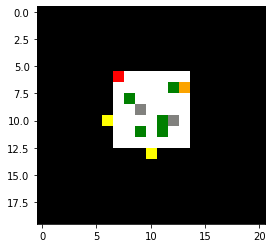

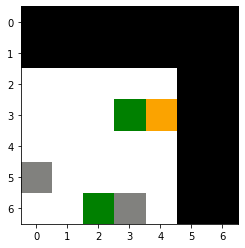

In [ ]:
current_map = get_current_map(env,obs[0], players[0])
plt.imshow(current_map, cmap=cmap)
plt.show()
killer_view = get_player_view(killer, map, killer_sight)
plt.imshow(killer_view, cmap=cmap)

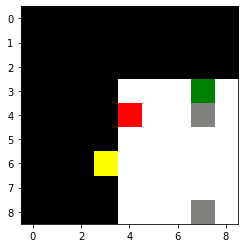

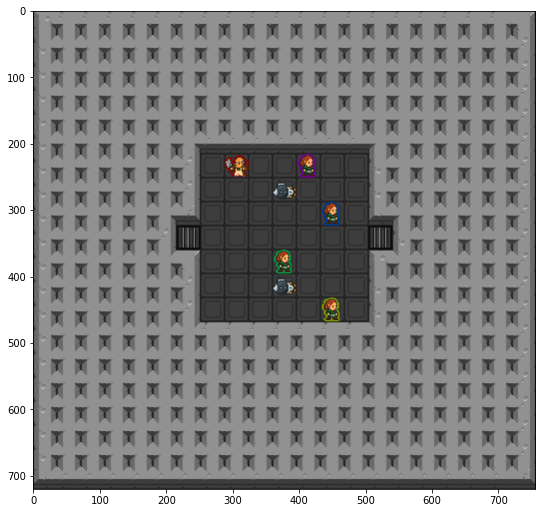

In [ ]:
plt.figure(figsize=(9,10))
plt.imshow(env.render(mode='vector',observer='global'))

In [ ]:
print(generate_random_map(base_level_string))

      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W   W  
      W   W   W   W   W   W   e   p1  .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   p2  .   W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   p3  W   W   W   W   W   W   W
      W   W   W   W   W   W   W   .   .   .   .   .   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   e   .   .   p4  .   g   .   .   W   W   W   W   W   W   W
      W   W   W   W   W   W   

##### main loop

In [ ]:
from tqdm import tqdm_notebook as tqdm
from griddly import GymWrapperFactory, gd
from griddly.RenderTools import VideoRecorder
import numpy as np
import matplotlib.pyplot as plt
from griddly.util.wrappers import ValidActionSpaceWrapper
from collections import deque
 
maps, history = [], []
game_number = 0
learning_rate = 0.00001
n_survivors = 4
 
env = gym.make('GDY-dbd-v0', 
               global_observer_type=gd.ObserverType.SPRITE_2D, 
               player_observer_type=gd.ObserverType.VECTOR, 
               image_path='sprites')
env.enable_history(True)
use_killer = True
random_map = generate_random_map(base_level_string6, killer=use_killer)
maps.append(random_map)
obs = env.reset(level_string=random_map)
env = ValidActionSpaceWrapper(env)
objects = get_objects(env)
killer, survivors = get_players(objects)
n_survivors = 4
# killer_model = init_model(killer_action_space, 490)
# survivor_model = init_model(survivor_action_space, 539)

# killer_score_history = []
# escaped_survivors_history = []
# killer_game_states, killer_action_probability_gradients, killer_rewards, killer_action_probabilities, killer_reward_sums, killer_game_rewards,  = [], [], [], [], [], []
# survivor_game_states, survivor_rewards, survivor_action_probability_gradients, survivor_action_probabilities, survivor_reward_sums, survivor_game_rewards = [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]]
 
# generators_repaired_time_history = []
# exit_gates_opened_time_history = []
# killer_attack_count_history = []

killer_reward_sum = 0
escaped_survivors = 0
 
## initial player states
current_map = get_current_map(env, obs[0], killer)
killer_state = get_state(killer, objects, current_map, killer_sight, killer=True)
survivor_states = [get_state(survivor, objects, current_map, survivor_sight, killer=False) for survivor in survivors]

max_turns = 2000

all_rewards = []
## training loop
n_games = 10000
valid_history = []
for game in range(500,n_games):
  survivor_predict_models = [keras.models.clone_model(survivor_model) for i in range(n_survivors)]
  max_turns_reached = False
  if game % 25 == 0 and (game>=0):
    record = True
    video_recorder = VideoRecorder()
    video_dim = env.render(mode='rgbarray', observer='global').shape
    video_recorder.start(f"training-new-map-{game}.mp4", video_dim)
  else:
    record = False
  game_history = []
  for turn in tqdm(range(max_turns+1), leave=False):
    objects = get_objects(env)
    killer, survivors = get_players(objects)
 
    alive_survivors = [i['PlayerId'] for i in survivors if i]
    current_map = get_current_map(env, obs[0], killer)

    # generators = [i for i in objects if i["Name"]=="generator"]
    exit_gates = [i for i in objects if i["Name"]=="exit_gate"]
    ## exit gates powered
    if len(generators_repaired_time_history)<game+1 and exit_gates[0]['Variables']["is_powered"] == 1:
      generators_repaired_time_history.append(turn+1)
    exit_gates_open = [True for i in exit_gates if i['Variables']["is_open"]]
    if len(exit_gates_opened_time_history)<game+1 and len(exit_gates_open)>0:
      exit_gates_opened_time_history.append(turn+1)
 
    ## get player states
    if use_killer:
      killer_state = get_state(killer, objects, current_map, killer_sight, killer=True)
      killer_action_probabilities_current = killer_model(killer_state.reshape(1,1,-1)).numpy()[0] 
      killer_action, killer_action_index = choose_valid_action(
        env, 
        killer_action_probabilities_current, 
        killer, 
        killer_possible_actions, 
        killer_action_space
        )
    else:
      killer_action = np.array([1,0])

    survivor_states = [
        get_state(survivor, objects, current_map, survivor_sight, killer=False) if survivor else None for survivor in survivors
    ]
        
    survivor_action_probabilities_current = [
        model(player_state.reshape(1,1,-1)).numpy()[0] 
        if survivor else None for model,player_state,survivor in zip(survivor_predict_models, survivor_states, survivors)
        ]    
    survivor_actions = [
                        choose_valid_action(env, 
                                            action_probabilities, 
                                            survivor, 
                                            survivor_possible_actions, 
                                            survivor_action_space) 
                        for survivor, action_probabilities in zip(survivors, survivor_action_probabilities_current)
                        ]
    survivor_actions_indexes = [i[1] for i in survivor_actions]
    survivor_actions = [i[0] for i in survivor_actions]
    actions = [killer_action] + survivor_actions
    ## execute chosen actions
    obs, reward, done, info = env.step(actions)
    game_history.append(info['History'])

 
    ## calculate action probability gradients
    if use_killer:
      killer_pseudo_action_probabilities = np.zeros(len(killer_action_space))
      killer_pseudo_action_probabilities[killer_action_index] = 1

    survivor_pseudo_action_probabilities = []
    for action_index in survivor_actions_indexes:
      j = np.zeros(len(survivor_action_space))
      j[action_index] = 1
      survivor_pseudo_action_probabilities.append(j)
 
    survivor_rewards_current = [0]*len(survivors)


    if turn >= max_turns:
      done = True
      max_turns_reached = True
    if done:
      global_variables = env.game.get_state()['GlobalVariables']
      downed_survivors = sum([1 if i['Variables']['health']==0 else 0 for i in survivors if i])
      escaped_survivors = survivors.count(None) + survivor_rewards_current.count(1)
      # killer_reward = downed_survivors/len(survivors)
      if max_turns_reached:
        killer_reward = downed_survivors/len(survivors)
      else:
        killer_reward = (len(survivors)-escaped_survivors)/len(survivors)
      if killer_reward == 0: ## if no downed survivors
        killer_reward = -1
      survivor_rewards_current = [s_reward if s_reward==1 else (-1 if s else None) for s,s_reward in zip(survivors, reward[1:])]
    else:
      ## remember state, action probabilities, action probability gradients, rewards
      killer_reward = reward[0]
      survivor_rewards_current = [r if s else None for s,r in zip(survivors,reward[1:])]
      all_rewards.append(reward)
    # print(survivor_rewards_current)
    if killer_reward != 0:
      print(f"killer just scored {killer_reward} points")
    
      
    if use_killer:
      killer_reward_sum += killer_reward
      killer_rewards.append(killer_reward)
      killer_game_states.append(killer_state)
      killer_action_probabilities.append(killer_action_probabilities_current)
      killer_action_probability_gradients.append(killer_pseudo_action_probabilities - killer_action_probabilities_current)
    
    survivor_reward_sums = [reward_sum + r for reward_sum, r in zip(survivor_reward_sums, survivor_rewards_current) if r]
    for survivor, survivor_game_state_list, survivor_state, prob_grads, probs_list, probs, pseudo_probs, game_reward_list, survivor_reward, rewards_list in zip(
        survivors,
        survivor_game_states, 
        survivor_states, 
        survivor_action_probability_gradients, 
        survivor_action_probabilities, 
        survivor_action_probabilities_current,
        survivor_pseudo_action_probabilities,
        survivor_game_rewards,
        survivor_rewards_current,
        survivor_rewards):
      if survivor:
        survivor_game_state_list.append(survivor_state)
        probs_list.append(probs)
        prob_grads.append(pseudo_probs - probs)
        rewards_list.append(survivor_reward)
    ## record
    if record:
      frame = env.render(mode='rgbarray', observer='global')
      video_recorder.add_frame(frame)
    ## check if game finished
    if done:
      if len(generators_repaired_time_history)<game+1:
        generators_repaired_time_history.append(max_turns)
      if len(exit_gates_opened_time_history)<game+1:
        exit_gates_opened_time_history.append(max_turns)

      killer_model.reset_states()
      survivor_model.reset_states()
      escaped_survivors_history.append(escaped_survivors)
      killer_score_history.append(killer_reward_sum)
      ## stop recording
      if record:
        video_recorder.close()
 
      ## increment game 
      game_number += 1
 
      ## log game results
      killer_game_rewards.append(killer_reward_sum)
      for game_rewards_list, reward_sum in zip(survivor_game_rewards, survivor_reward_sums):
        game_rewards_list.append(reward_sum)
 
      history.append(game_history)
      killer_attack_count = 0
      for turn_history in game_history:
        killer_action = [i for i in turn_history if i["PlayerId"]==1]
        if len(killer_action)>=1:
          if killer_action[0]["ActionName"]=="attack":
            killer_attack_count += 1
      killer_attack_count_history.append(killer_attack_count)
      game_results = f"""Game {game_number} 
      - Killer Score: {killer_reward_sum} - Running Avg: {np.mean(killer_score_history[-50:])}
      - Escaped Survivors: {escaped_survivors} - Running Avg: {np.mean(escaped_survivors_history[-50:])}
      - Generators Repair Time: {generators_repaired_time_history[-1]} - Running Avg: {np.mean(generators_repaired_time_history[-50:])}
      - Exit Gates Opened Time: {exit_gates_opened_time_history[-1]} - Running Avg: {np.mean(exit_gates_opened_time_history[-50:])}
      - Killer Attacks: {killer_attack_count} - Running Avg: {np.mean(killer_attack_count_history[-50:])}"""
      print(game_results)
 
      # if game%10==0 and game!=0:
      ## handle reward propagation
      if use_killer:
        killer_action_probability_gradients = np.vstack(killer_action_probability_gradients)
        killer_rewards = process_rewards(killer_rewards)
      survivor_action_probability_gradients = [np.vstack(i) for i in survivor_action_probability_gradients]
      s_rewards = survivor_rewards
      # survivor_rewards = [[i for i in j if i] for j in survivor_rewards]
      survivor_rewards = [process_rewards(i) for i in survivor_rewards]

      ## construct training data
      if use_killer:
        killer_X = np.vstack(killer_game_states)
        killer_y = killer_action_probabilities + learning_rate * killer_rewards * killer_action_probability_gradients
        survivor_X = [np.vstack(i) for i in survivor_game_states]
      survivor_y = [
          action_probs + learning_rate * rewards * action_prob_grad 
          for action_probs, rewards, action_prob_grad in zip(survivor_action_probabilities, 
                                                              survivor_rewards, 
                                                              survivor_action_probability_gradients)
          ]
 
      ## train models
      if use_killer:
        for X, y in zip(killer_X, killer_y):
          killer_model.train_on_batch(X.reshape(1,1,-1), y.reshape(1,-1))
        killer_model.reset_states()
      for s_X, s_y in zip(survivor_X, survivor_y):
        for X, y in zip(s_X, s_y):
          survivor_model.train_on_batch(X.reshape(1,1,-1), y.reshape(1,-1))
        survivor_model.reset_states()
      
      ## reset for next game
      killer_game_states, killer_action_probability_gradients, killer_rewards, killer_action_probabilities, killer_reward_sums,  = [], [], [], [], []
      survivor_game_states, survivor_rewards, survivor_action_probability_gradients, survivor_action_probabilities, survivor_reward_sums = [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]], [[],[],[],[]]
 
      killer_reward_sum = 0
      survivor_reward_sums = [0]*len(survivors)
 
      killer_states_deque = deque(maxlen=10)
      survivor_states_deque = [deque(maxlen=10)]*len(survivors)

      if game > 500:
        generate_random_map(base_level_string6)
      else:
        generate_random_map(base_level_string2)
      #   if game > 300:
      #     random_map = generate_random_map(base_level_string5)
      #   elif game > 200:
      #     random_map = generate_random_map(base_level_string4)
      #   elif game > 100:
      #     random_map = generate_random_map(base_level_string3)
      #   else:
      #     random_map = generate_random_map(base_level_string2)
      # else:
      #   random_map = generate_random_map(base_level_string1)
      maps.append(random_map)
      obs = env.reset(level_string=random_map)
 
      ## initial player states
      current_map = get_current_map(env, obs[0], killer)
      objects = get_objects(env)
      killer, survivors = get_players(objects)
      killer_state = get_state(killer, objects, current_map, killer_sight, killer=True)
      survivor_states = [get_state(survivor, objects, current_map, survivor_sight, killer=False) for survivor in survivors]
      all_rewards = []
      break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 1 
      - Killer Score: 0.25 - Running Avg: 0.465
      - Escaped Survivors: 0 - Running Avg: 2.08
      - Generators Repair Time: 181 - Running Avg: 148.16
      - Exit Gates Opened Time: 342 - Running Avg: 327.22
      - Killer Attacks: 5 - Running Avg: 14.22


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 2 
      - Killer Score: -1 - Running Avg: 0.425
      - Escaped Survivors: 0 - Running Avg: 2.08
      - Generators Repair Time: 181 - Running Avg: 148.16
      - Exit Gates Opened Time: 342 - Running Avg: 327.22
      - Killer Attacks: 4 - Running Avg: 14.14


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 3 
      - Killer Score: -1 - Running Avg: 0.4
      - Escaped Survivors: 1 - Running Avg: 2.04
      - Generators Repair Time: 181 - Running Avg: 148.16
      - Exit Gates Opened Time: 1651 - Running Avg: 358.48
      - Killer Attacks: 4 - Running Avg: 13.96


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 4 
      - Killer Score: 0.25 - Running Avg: 0.4
      - Escaped Survivors: 2 - Running Avg: 2.02
      - Generators Repair Time: 309 - Running Avg: 114.34
      - Exit Gates Opened Time: 366 - Running Avg: 325.8
      - Killer Attacks: 2 - Running Avg: 13.7


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 5 
      - Killer Score: 0.25 - Running Avg: 0.395
      - Escaped Survivors: 2 - Running Avg: 2.02
      - Generators Repair Time: 647 - Running Avg: 126.32
      - Exit Gates Opened Time: 694 - Running Avg: 337.28
      - Killer Attacks: 9 - Running Avg: 13.68


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 6 
      - Killer Score: 0.5 - Running Avg: 0.39
      - Escaped Survivors: 0 - Running Avg: 2.0
      - Generators Repair Time: 2000 - Running Avg: 163.56
      - Exit Gates Opened Time: 2000 - Running Avg: 371.86
      - Killer Attacks: 13 - Running Avg: 13.64


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 7 
      - Killer Score: 0.5 - Running Avg: 0.385
      - Escaped Survivors: 0 - Running Avg: 1.98
      - Generators Repair Time: 2000 - Running Avg: 201.44
      - Exit Gates Opened Time: 2000 - Running Avg: 405.36
      - Killer Attacks: 13 - Running Avg: 13.68


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 8 
      - Killer Score: 0.75 - Running Avg: 0.39
      - Escaped Survivors: 0 - Running Avg: 1.94
      - Generators Repair Time: 2000 - Running Avg: 238.58
      - Exit Gates Opened Time: 2000 - Running Avg: 440.06
      - Killer Attacks: 6 - Running Avg: 13.5


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 9 
      - Killer Score: -1 - Running Avg: 0.365
      - Escaped Survivors: 0 - Running Avg: 1.88
      - Generators Repair Time: 2000 - Running Avg: 277.18
      - Exit Gates Opened Time: 2000 - Running Avg: 476.64
      - Killer Attacks: 4 - Running Avg: 13.18


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 10 
      - Killer Score: 0.25 - Running Avg: 0.365
      - Escaped Survivors: 0 - Running Avg: 1.82
      - Generators Repair Time: 1420 - Running Avg: 304.62
      - Exit Gates Opened Time: 2000 - Running Avg: 510.34
      - Killer Attacks: 3 - Running Avg: 13.04


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 11 
      - Killer Score: 0.5 - Running Avg: 0.355
      - Escaped Survivors: 0 - Running Avg: 1.82
      - Generators Repair Time: 87 - Running Avg: 304.62
      - Exit Gates Opened Time: 2000 - Running Avg: 547.62
      - Killer Attacks: 8 - Running Avg: 12.94


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 12 
      - Killer Score: 0.25 - Running Avg: 0.35
      - Escaped Survivors: 0 - Running Avg: 1.78
      - Generators Repair Time: 2000 - Running Avg: 343.22
      - Exit Gates Opened Time: 2000 - Running Avg: 582.4
      - Killer Attacks: 9 - Running Avg: 12.78


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 13 
      - Killer Score: 0.5 - Running Avg: 0.355
      - Escaped Survivors: 0 - Running Avg: 1.72
      - Generators Repair Time: 2000 - Running Avg: 379.04
      - Exit Gates Opened Time: 2000 - Running Avg: 582.4
      - Killer Attacks: 5 - Running Avg: 12.74


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 14 
      - Killer Score: -1 - Running Avg: 0.325
      - Escaped Survivors: 1 - Running Avg: 1.7
      - Generators Repair Time: 844 - Running Avg: 392.26
      - Exit Gates Opened Time: 1687 - Running Avg: 612.04
      - Killer Attacks: 2 - Running Avg: 12.48


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 15 
      - Killer Score: 0.25 - Running Avg: 0.32
      - Escaped Survivors: 0 - Running Avg: 1.66
      - Generators Repair Time: 2000 - Running Avg: 431.52
      - Exit Gates Opened Time: 2000 - Running Avg: 649.52
      - Killer Attacks: 5 - Running Avg: 12.16


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 16 
      - Killer Score: 0.25 - Running Avg: 0.315
      - Escaped Survivors: 0 - Running Avg: 1.62
      - Generators Repair Time: 526 - Running Avg: 440.06
      - Exit Gates Opened Time: 2000 - Running Avg: 685.62
      - Killer Attacks: 7 - Running Avg: 11.88


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 17 
      - Killer Score: 0.5 - Running Avg: 0.32
      - Escaped Survivors: 0 - Running Avg: 1.56
      - Generators Repair Time: 1758 - Running Avg: 471.8
      - Exit Gates Opened Time: 2000 - Running Avg: 716.86
      - Killer Attacks: 6 - Running Avg: 11.62


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 18 
      - Killer Score: -1 - Running Avg: 0.295
      - Escaped Survivors: 0 - Running Avg: 1.5
      - Generators Repair Time: 2000 - Running Avg: 509.5
      - Exit Gates Opened Time: 2000 - Running Avg: 750.32
      - Killer Attacks: 8 - Running Avg: 11.6


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 19 
      - Killer Score: -1 - Running Avg: 0.27
      - Escaped Survivors: 1 - Running Avg: 1.46
      - Generators Repair Time: 413 - Running Avg: 513.96
      - Exit Gates Opened Time: 918 - Running Avg: 761.42
      - Killer Attacks: 4 - Running Avg: 11.5


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 20 
      - Killer Score: 0.75 - Running Avg: 0.28
      - Escaped Survivors: 0 - Running Avg: 1.4
      - Generators Repair Time: 95 - Running Avg: 514.7
      - Exit Gates Opened Time: 2000 - Running Avg: 799.32
      - Killer Attacks: 6 - Running Avg: 11.04


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 21 
      - Killer Score: 0.25 - Running Avg: 0.28
      - Escaped Survivors: 0 - Running Avg: 1.34
      - Generators Repair Time: 706 - Running Avg: 528.3
      - Exit Gates Opened Time: 2000 - Running Avg: 838.2
      - Killer Attacks: 4 - Running Avg: 10.94


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 22 
      - Killer Score: 0.5 - Running Avg: 0.28
      - Escaped Survivors: 0 - Running Avg: 1.3
      - Generators Repair Time: 372 - Running Avg: 532.62
      - Exit Gates Opened Time: 2000 - Running Avg: 871.06
      - Killer Attacks: 7 - Running Avg: 10.76


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 23 
      - Killer Score: 0.5 - Running Avg: 0.28
      - Escaped Survivors: 0 - Running Avg: 1.26
      - Generators Repair Time: 2000 - Running Avg: 570.76
      - Exit Gates Opened Time: 2000 - Running Avg: 906.94
      - Killer Attacks: 8 - Running Avg: 10.56


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 24 
      - Killer Score: 0.5 - Running Avg: 0.275
      - Escaped Survivors: 0 - Running Avg: 1.24
      - Generators Repair Time: 1378 - Running Avg: 594.24
      - Exit Gates Opened Time: 2000 - Running Avg: 941.72
      - Killer Attacks: 7 - Running Avg: 10.42


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 25 
      - Killer Score: 0.5 - Running Avg: 0.275
      - Escaped Survivors: 0 - Running Avg: 1.2
      - Generators Repair Time: 1984 - Running Avg: 631.8
      - Exit Gates Opened Time: 2000 - Running Avg: 974.76
      - Killer Attacks: 5 - Running Avg: 10.12


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 26 
      - Killer Score: 0.5 - Running Avg: 0.275
      - Escaped Survivors: 0 - Running Avg: 1.16
      - Generators Repair Time: 2000 - Running Avg: 671.0
      - Exit Gates Opened Time: 2000 - Running Avg: 1011.5
      - Killer Attacks: 5 - Running Avg: 9.92


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 27 
      - Killer Score: 0.5 - Running Avg: 0.275
      - Escaped Survivors: 0 - Running Avg: 1.12
      - Generators Repair Time: 1173 - Running Avg: 692.86
      - Exit Gates Opened Time: 2000 - Running Avg: 1043.24
      - Killer Attacks: 6 - Running Avg: 9.8


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 28 
      - Killer Score: 0.25 - Running Avg: 0.27
      - Escaped Survivors: 0 - Running Avg: 1.08
      - Generators Repair Time: 1738 - Running Avg: 726.34
      - Exit Gates Opened Time: 2000 - Running Avg: 1078.54
      - Killer Attacks: 8 - Running Avg: 9.58


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 29 
      - Killer Score: 0.25 - Running Avg: 0.265
      - Escaped Survivors: 1 - Running Avg: 1.06
      - Generators Repair Time: 718 - Running Avg: 739.9
      - Exit Gates Opened Time: 1101 - Running Avg: 1097.54
      - Killer Attacks: 3 - Running Avg: 9.36


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 30 
      - Killer Score: -1 - Running Avg: 0.235
      - Escaped Survivors: 0 - Running Avg: 1.02
      - Generators Repair Time: 923 - Running Avg: 757.6
      - Exit Gates Opened Time: 2000 - Running Avg: 1129.74
      - Killer Attacks: 6 - Running Avg: 9.36


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 31 
      - Killer Score: 0.25 - Running Avg: 0.23
      - Escaped Survivors: 0 - Running Avg: 0.98
      - Generators Repair Time: 1017 - Running Avg: 775.66
      - Exit Gates Opened Time: 2000 - Running Avg: 1163.26
      - Killer Attacks: 7 - Running Avg: 9.2


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 32 
      - Killer Score: 0.25 - Running Avg: 0.225
      - Escaped Survivors: 2 - Running Avg: 0.98
      - Generators Repair Time: 459 - Running Avg: 784.4
      - Exit Gates Opened Time: 507 - Running Avg: 1171.56
      - Killer Attacks: 5 - Running Avg: 9.1


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 33 
      - Killer Score: 0.5 - Running Avg: 0.23
      - Escaped Survivors: 1 - Running Avg: 0.94
      - Generators Repair Time: 104 - Running Avg: 781.48
      - Exit Gates Opened Time: 1453 - Running Avg: 1193.48
      - Killer Attacks: 7 - Running Avg: 9.0


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 34 
      - Killer Score: 0.5 - Running Avg: 0.22
      - Escaped Survivors: 0 - Running Avg: 0.94
      - Generators Repair Time: 558 - Running Avg: 791.18
      - Exit Gates Opened Time: 2000 - Running Avg: 1228.26
      - Killer Attacks: 6 - Running Avg: 8.82


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 35 
      - Killer Score: 0.75 - Running Avg: 0.225
      - Escaped Survivors: 0 - Running Avg: 0.9
      - Generators Repair Time: 2000 - Running Avg: 830.34
      - Exit Gates Opened Time: 2000 - Running Avg: 1262.42
      - Killer Attacks: 7 - Running Avg: 8.84


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 36 
      - Killer Score: -1 - Running Avg: 0.195
      - Escaped Survivors: 0 - Running Avg: 0.86
      - Generators Repair Time: 2000 - Running Avg: 867.44
      - Exit Gates Opened Time: 2000 - Running Avg: 1291.92
      - Killer Attacks: 4 - Running Avg: 8.6


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 37 
      - Killer Score: 0.75 - Running Avg: 0.195
      - Escaped Survivors: 0 - Running Avg: 0.84
      - Generators Repair Time: 2000 - Running Avg: 906.88
      - Exit Gates Opened Time: 2000 - Running Avg: 1329.94
      - Killer Attacks: 7 - Running Avg: 8.34


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 38 
      - Killer Score: -1 - Running Avg: 0.165
      - Escaped Survivors: 0 - Running Avg: 0.8
      - Generators Repair Time: 772 - Running Avg: 919.78
      - Exit Gates Opened Time: 1318 - Running Avg: 1352.6
      - Killer Attacks: 7 - Running Avg: 8.26


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 39 
      - Killer Score: -1 - Running Avg: 0.135
      - Escaped Survivors: 0 - Running Avg: 0.76
      - Generators Repair Time: 1996 - Running Avg: 956.82
      - Exit Gates Opened Time: 2000 - Running Avg: 1388.24
      - Killer Attacks: 2 - Running Avg: 7.76


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 40 
      - Killer Score: 0.25 - Running Avg: 0.135
      - Escaped Survivors: 0 - Running Avg: 0.7
      - Generators Repair Time: 2000 - Running Avg: 992.66
      - Exit Gates Opened Time: 2000 - Running Avg: 1423.52
      - Killer Attacks: 6 - Running Avg: 7.76


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 41 
      - Killer Score: -1 - Running Avg: 0.11
      - Escaped Survivors: 0 - Running Avg: 0.64
      - Generators Repair Time: 2000 - Running Avg: 1029.8
      - Exit Gates Opened Time: 2000 - Running Avg: 1455.58
      - Killer Attacks: 4 - Running Avg: 7.58


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 42 
      - Killer Score: 0.5 - Running Avg: 0.11
      - Escaped Survivors: 0 - Running Avg: 0.6
      - Generators Repair Time: 1588 - Running Avg: 1058.62
      - Exit Gates Opened Time: 2000 - Running Avg: 1490.98
      - Killer Attacks: 5 - Running Avg: 7.24


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 43 
      - Killer Score: -1 - Running Avg: 0.08
      - Escaped Survivors: 2 - Running Avg: 0.6
      - Generators Repair Time: 409 - Running Avg: 1065.06
      - Exit Gates Opened Time: 616 - Running Avg: 1498.94
      - Killer Attacks: 1 - Running Avg: 6.94


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 44 
      - Killer Score: 0.25 - Running Avg: 0.07
      - Escaped Survivors: 0 - Running Avg: 0.58
      - Generators Repair Time: 2000 - Running Avg: 1102.36
      - Exit Gates Opened Time: 2000 - Running Avg: 1526.26
      - Killer Attacks: 2 - Running Avg: 6.42


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 45 
      - Killer Score: 0.25 - Running Avg: 0.07
      - Escaped Survivors: 0 - Running Avg: 0.52
      - Generators Repair Time: 508 - Running Avg: 1110.2
      - Exit Gates Opened Time: 2000 - Running Avg: 1558.58
      - Killer Attacks: 8 - Running Avg: 6.4


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 46 
      - Killer Score: -1 - Running Avg: 0.045
      - Escaped Survivors: 1 - Running Avg: 0.48
      - Generators Repair Time: 508 - Running Avg: 1115.42
      - Exit Gates Opened Time: 1294 - Running Avg: 1575.08
      - Killer Attacks: 5 - Running Avg: 6.32


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 47 
      - Killer Score: 0.25 - Running Avg: 0.04
      - Escaped Survivors: 0 - Running Avg: 0.44
      - Generators Repair Time: 2000 - Running Avg: 1153.14
      - Exit Gates Opened Time: 2000 - Running Avg: 1612.44
      - Killer Attacks: 3 - Running Avg: 6.1


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 48 
      - Killer Score: 0.5 - Running Avg: 0.045
      - Escaped Survivors: 0 - Running Avg: 0.38
      - Generators Repair Time: 1277 - Running Avg: 1176.32
      - Exit Gates Opened Time: 2000 - Running Avg: 1649.72
      - Killer Attacks: 7 - Running Avg: 6.04


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 49 
      - Killer Score: 0.5 - Running Avg: 0.05
      - Escaped Survivors: 0 - Running Avg: 0.32
      - Generators Repair Time: 170 - Running Avg: 1176.3
      - Exit Gates Opened Time: 831 - Running Avg: 1658.92
      - Killer Attacks: 13 - Running Avg: 6.12


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 50 
      - Killer Score: 0.5 - Running Avg: 0.05
      - Escaped Survivors: 1 - Running Avg: 0.3
      - Generators Repair Time: 369 - Running Avg: 1182.86
      - Exit Gates Opened Time: 839 - Running Avg: 1673.94
      - Killer Attacks: 14 - Running Avg: 6.04


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 51 
      - Killer Score: 0.25 - Running Avg: 0.05
      - Escaped Survivors: 0 - Running Avg: 0.3
      - Generators Repair Time: 2000 - Running Avg: 1222.22
      - Exit Gates Opened Time: 2000 - Running Avg: 1712.34
      - Killer Attacks: 5 - Running Avg: 6.04


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 52 
      - Killer Score: 0.5 - Running Avg: 0.08
      - Escaped Survivors: 0 - Running Avg: 0.3
      - Generators Repair Time: 306 - Running Avg: 1226.26
      - Exit Gates Opened Time: 562 - Running Avg: 1716.74
      - Killer Attacks: 12 - Running Avg: 6.2


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 53 
      - Killer Score: 0.5 - Running Avg: 0.11
      - Escaped Survivors: 0 - Running Avg: 0.28
      - Generators Repair Time: 1844 - Running Avg: 1259.52
      - Exit Gates Opened Time: 2000 - Running Avg: 1723.72
      - Killer Attacks: 4 - Running Avg: 6.2


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 54 
      - Killer Score: 0.25 - Running Avg: 0.11
      - Escaped Survivors: 0 - Running Avg: 0.24
      - Generators Repair Time: 2000 - Running Avg: 1293.34
      - Exit Gates Opened Time: 2000 - Running Avg: 1756.4
      - Killer Attacks: 5 - Running Avg: 6.26


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 55 
      - Killer Score: -1 - Running Avg: 0.085
      - Escaped Survivors: 1 - Running Avg: 0.22
      - Generators Repair Time: 576 - Running Avg: 1291.92
      - Exit Gates Opened Time: 1011 - Running Avg: 1762.74
      - Killer Attacks: 4 - Running Avg: 6.16


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 56 
      - Killer Score: 0.25 - Running Avg: 0.08
      - Escaped Survivors: 0 - Running Avg: 0.22
      - Generators Repair Time: 2000 - Running Avg: 1291.92
      - Exit Gates Opened Time: 2000 - Running Avg: 1762.74
      - Killer Attacks: 2 - Running Avg: 5.94


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 57 
      - Killer Score: 0.25 - Running Avg: 0.075
      - Escaped Survivors: 0 - Running Avg: 0.22
      - Generators Repair Time: 1858 - Running Avg: 1289.08
      - Exit Gates Opened Time: 2000 - Running Avg: 1762.74
      - Killer Attacks: 7 - Running Avg: 5.82


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 58 
      - Killer Score: 0.25 - Running Avg: 0.065
      - Escaped Survivors: 2 - Running Avg: 0.26
      - Generators Repair Time: 800 - Running Avg: 1265.08
      - Exit Gates Opened Time: 827 - Running Avg: 1739.28
      - Killer Attacks: 5 - Running Avg: 5.8


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 59 
      - Killer Score: 0.75 - Running Avg: 0.1
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 2000 - Running Avg: 1265.08
      - Exit Gates Opened Time: 2000 - Running Avg: 1739.28
      - Killer Attacks: 6 - Running Avg: 5.84


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 60 
      - Killer Score: -1 - Running Avg: 0.075
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 428 - Running Avg: 1245.24
      - Exit Gates Opened Time: 2000 - Running Avg: 1739.28
      - Killer Attacks: 6 - Running Avg: 5.9


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 61 
      - Killer Score: 0.25 - Running Avg: 0.07
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 2000 - Running Avg: 1283.5
      - Exit Gates Opened Time: 2000 - Running Avg: 1739.28
      - Killer Attacks: 3 - Running Avg: 5.8


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 62 
      - Killer Score: 0.25 - Running Avg: 0.07
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 1184 - Running Avg: 1267.18
      - Exit Gates Opened Time: 1303 - Running Avg: 1725.34
      - Killer Attacks: 5 - Running Avg: 5.72


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 63 
      - Killer Score: -1 - Running Avg: 0.04
      - Escaped Survivors: 1 - Running Avg: 0.28
      - Generators Repair Time: 205 - Running Avg: 1231.28
      - Exit Gates Opened Time: 1247 - Running Avg: 1710.28
      - Killer Attacks: 3 - Running Avg: 5.68


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 64 
      - Killer Score: 0.5 - Running Avg: 0.07
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 1202 - Running Avg: 1238.44
      - Exit Gates Opened Time: 2000 - Running Avg: 1716.54
      - Killer Attacks: 7 - Running Avg: 5.78


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 65 
      - Killer Score: 0.5 - Running Avg: 0.075
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 1908 - Running Avg: 1236.6
      - Exit Gates Opened Time: 2000 - Running Avg: 1716.54
      - Killer Attacks: 5 - Running Avg: 5.78


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 66 
      - Killer Score: 0.25 - Running Avg: 0.075
      - Escaped Survivors: 0 - Running Avg: 0.26
      - Generators Repair Time: 2000 - Running Avg: 1266.08
      - Exit Gates Opened Time: 2000 - Running Avg: 1716.54
      - Killer Attacks: 2 - Running Avg: 5.68


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored -1 points
Game 67 
      - Killer Score: -1 - Running Avg: 0.045
      - Escaped Survivors: 2 - Running Avg: 0.3
      - Generators Repair Time: 405 - Running Avg: 1239.02
      - Exit Gates Opened Time: 498 - Running Avg: 1686.5
      - Killer Attacks: 3 - Running Avg: 5.62


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.5 points
Game 68 
      - Killer Score: 0.5 - Running Avg: 0.075
      - Escaped Survivors: 0 - Running Avg: 0.3
      - Generators Repair Time: 2000 - Running Avg: 1239.02
      - Exit Gates Opened Time: 2000 - Running Avg: 1686.5
      - Killer Attacks: 6 - Running Avg: 5.58


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 1.0 points
Game 69 
      - Killer Score: 1.0 - Running Avg: 0.115
      - Escaped Survivors: 0 - Running Avg: 0.28
      - Generators Repair Time: 2000 - Running Avg: 1270.76
      - Exit Gates Opened Time: 2000 - Running Avg: 1708.14
      - Killer Attacks: 8 - Running Avg: 5.66


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.75 points
Game 70 
      - Killer Score: 0.75 - Running Avg: 0.115
      - Escaped Survivors: 0 - Running Avg: 0.28
      - Generators Repair Time: 927 - Running Avg: 1287.4
      - Exit Gates Opened Time: 2000 - Running Avg: 1708.14
      - Killer Attacks: 13 - Running Avg: 5.8


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 71 
      - Killer Score: 0.25 - Running Avg: 0.115
      - Escaped Survivors: 1 - Running Avg: 0.3
      - Generators Repair Time: 757 - Running Avg: 1288.42
      - Exit Gates Opened Time: 1674 - Running Avg: 1701.62
      - Killer Attacks: 2 - Running Avg: 5.76


  0%|          | 0/2001 [00:00<?, ?it/s]

killer just scored 0.25 points
Game 72 
      - Killer Score: 0.25 - Running Avg: 0.11
      - Escaped Survivors: 0 - Running Avg: 0.3
      - Generators Repair Time: 1201 - Running Avg: 1305.0
      - Exit Gates Opened Time: 2000 - Running Avg: 1701.62
      - Killer Attacks: 3 - Running Avg: 5.68


In [ ]:
f"""Game {game_number} 
- Killer Score: {killer_reward_sum} - Running Avg: {np.mean(killer_score_history[-50:])}
- Escaped Survivors: {escaped_survivors} - Running Avg: {np.mean(escaped_survivors_history[-50:])}
- Generators Repair Time: {generators_repaired_time_history[-1]} - Running Avg: {np.mean(generators_repaired_time_history[-50:])}
- Exit Gates Opened Time: {exit_gates_opened_time_history[-1]} - Running Avg: {np.mean(exit_gates_opened_time_history[-50:])}
- Killer Attacks: {killer_attack_count} - Running Avg: {np.mean(killer_attack_count_history[-50:])}"""

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 125))



IndexError: ignored

In [ ]:
print(f"""{killer_attack_count_history[-50:]}"""")

[0]


In [ ]:
killer_attack_count

0

In [ ]:
killer_attack_count_history[-50:]

[0]

In [ ]:
game_history[1]

[{'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [13, 14],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 1,
  'Rewards': {},
  'SourceLocation': [13, 13],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 1,
  'Tick': 1},
 {'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [22, 12],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 2,
  'Rewards': {},
  'SourceLocation': [22, 13],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 2,
  'Tick': 1},
 {'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [9, 17],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 3,
  'Rewards': {},
  'SourceLocation': [9, 18],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 3,
  'Tick': 1},
 {'ActionName': 'check_generator_progress',
  'Delay': 1,
  'DestinationLocation': [7, 25],
  'DestinationObjectName': 'exit_gate',
  'DestinationObjectP

In [ ]:
game_history[1]

[{'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [9, 11],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 1,
  'Rewards': {},
  'SourceLocation': [10, 11],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 1,
  'Tick': 1},
 {'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [25, 10],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 2,
  'Rewards': {},
  'SourceLocation': [26, 10],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 2,
  'Tick': 1},
 {'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [16, 11],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'PlayerId': 3,
  'Rewards': {},
  'SourceLocation': [15, 11],
  'SourceObjectName': 'player',
  'SourceObjectPlayerId': 3,
  'Tick': 1},
 {'ActionName': 'move',
  'Delay': 0,
  'DestinationLocation': [16, 14],
  'DestinationObjectName': '_empty',
  'DestinationObjectPlayerId': 0,
  'Playe

In [ ]:
actions

[array([1, 0]), array([8, 3])]

Metrics

How quickly are generators repaired?
How quickly after being powered are exit gates opened?


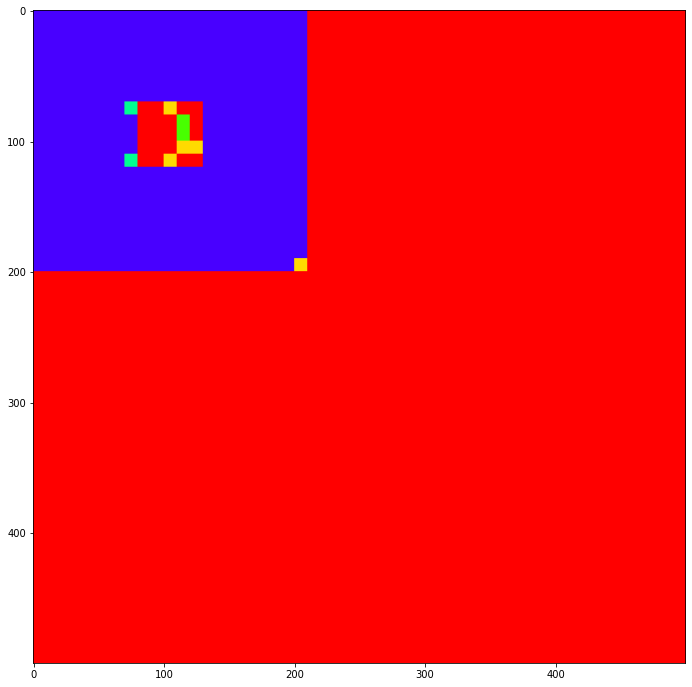

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(env.render(mode='rgb_array', observer=1))

In [ ]:
print(generate_random_map(base_level_string))

In [ ]:
plt.figure(figsize=(9,10))
plt.imshow(env.render(mode='vector',observer='global'))

In [ ]:
def create_frame(o):
  frame = np.swapaxes(o, 0, 1)
  frame = np.swapaxes(frame, 1, 2)
  return frame

def random_direction():
    return(np.random.choice([1, 2, 3, 4]))
def random_action(actions):
    return (np.random.choice(actions))

actions_list = ['initialize_killer', 'move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap', 'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_actions = ['move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap']
survivor_actions = ['move', 'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_action_ids = [actions_list.index(i) for i in killer_actions]
survivor_action_ids = [actions_list.index(i) for i in survivor_actions]

if __name__ == '__main__':

    video_recorder = VideoRecorder()

    env = gym.make('GDY-dbd-v0', global_observer_type=gd.ObserverType.SPRITE_2D, image_path='sprites') #  ISOMETRIC SPRITE_2D
    env.enable_history(True)
    obs = env.reset(global_observations=True)
    # env.render(observer='global')
    video_recorder.start("grid-by-daylight.mp4", (360, 324, 3))
    frame = env.render(mode='rgb_array', observer='global')
    video_recorder.add_frame(frame)

    ## progress bars
    if False:
        generator_progress_bar = tqdm(total=100, leave=True, desc = 'generators', position=0)
        downed_survivor_progress_bar = tqdm(total=4, leave=True, desc = 'downed survivors', position=0)
        exit_gate_progress_bar = tqdm(total=100, leave=True, desc='exit gate', position=0)
        monitor_generators = True
        monitor_exit_gate = True
        monitor_survivors = False

    for s in range(1000):
        # time.sleep(0.05)
        # actions = env.action_space.sample()
        actions = []
        for player in range(1,6):
            if player==1: ## killer
                actions.append(np.array([random_action(killer_action_ids), random_direction()], dtype=np.int64))
            else: ## survivor
                actions.append(np.array([random_action(survivor_action_ids), random_direction()], dtype=np.int64))
            # actions.append(np.array([1,random_direction()]))
        obs, reward, done, info = env.step(actions)
        frame = env.render(mode='rgb_array', observer='global')
        video_recorder.add_frame(frame)
        state = env.get_state()

        ## progress bars
        if False:

            progress = sum([i['Variables']['progress'] for i in state['Objects'] if i['Name']=='generator'])/3
            if monitor_generators:
                generator_progress_bar.n = progress
                generator_progress_bar.refresh()

            downed_survivors = state['GlobalVariables']['downed_survivors'][0]
            if monitor_survivors:
                downed_survivor_progress_bar.n = downed_survivors
                downed_survivor_progress_bar.refresh()

            if progress >= 100 and monitor_exit_gate:
                exit_gate_progress = [i['Variables']['progress'] for i in state['Objects'] if i['Name']=='exit_gate'][0]
                exit_gate_progress_bar.n = exit_gate_progress
                exit_gate_progress_bar.refresh() ## progress bar handling

        # env.render(observer=3) # Renders the entire environment
        # env.render(observer='global')

        if done:
            outcome = info['PlayerResults']['1']
            if outcome=='Win':
                print('Survivors won')
            else:
                print('Killer won')
            break
    video_recorder.close()
    env.close()

#### rrlib

In [ ]:
# a hand-coded policy that acts at random in the env (doesn't learn)
from ray.rllib.policy import Policy
_seed = 47
class RandomPolicy(Policy):
    """Hand-coded policy that returns random actions."""
    def __init__(self, observation_space, action_space, config):
        self.observation_space = observation_space
        self.action_space = action_space
        self.action_space.seed(_seed)
        self._model_init_state_automatically_added = False
        self.view_requirements = self._get_default_view_requirements()
    def compute_actions(self,
                        obs_batch,
                        state_batches,
                        prev_action_batch=None,
                        prev_reward_batch=None,
                        info_batch=None,
                        episodes=None,
                        **kwargs):
        """Compute actions on a batch of observations."""
        return [self.action_space.sample() for _ in obs_batch], [], {}

    def learn_on_batch(self, samples):
        """No learning."""
        #return {}
        pass

    def get_weights(self):
        pass

    def set_weights(self, weights):
        pass

##### SimpleConvAgent

In [ ]:
import numpy as np
from ray.rllib.models.torch.torch_modelv2 import TorchModelV2
from torch import nn
from griddly.util.rllib.torch.agents.common import layer_init
import torch.nn as nn
class SimpleConvAgent(TorchModelV2, nn.Module):
  """
  Simple Convolution agent that calculates the required linear output layer
  """

  def __init__(self, obs_space, action_space, num_outputs, model_config, name):
      super().__init__(obs_space, action_space, num_outputs, model_config, name)
      nn.Module.__init__(self)

      self._num_objects = obs_space.shape[2]
      self._num_actions = num_outputs

      linear_flatten = np.prod(obs_space.shape[:2])*64

      self.network = nn.Sequential(
          layer_init(nn.Conv2d(self._num_objects, 32, 3, padding=1)),
          nn.ReLU(),
          layer_init(nn.Conv2d(32, 64, 3, padding=1)),
          nn.ReLU(),
          nn.Flatten(),
          layer_init(nn.Linear(linear_flatten, 1024)),
          nn.ReLU(),
          layer_init(nn.Linear(1024, 512)),
          nn.ReLU(),
      )

      self._actor_head = nn.Sequential(
          layer_init(nn.Linear(512, 256), std=0.01),
          nn.ReLU(),
          layer_init(nn.Linear(256, self._num_actions), std=0.01)
      )

      self._critic_head = nn.Sequential(
          layer_init(nn.Linear(512, 1), std=0.01)
      )

  def forward(self, input_dict, state, seq_lens):
      obs_transformed = input_dict['obs'].permute(0, 3, 1, 2).float()
      network_output = self.network(obs_transformed)
      value = self._critic_head(network_output)
      self._value = value.reshape(-1)
      logits = self._actor_head(network_output)
      return logits, state

  def value_function(self):
      return self._value

/usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


##### GymWrapper

In [ ]:
import gym
import numpy as np
from gym.envs.registration import register

from griddly import GriddlyLoader, gd
from griddly.util.action_space import MultiAgentActionSpace
from griddly.util.observation_space import MultiAgentObservationSpace
from griddly.util.vector_visualization import Vector2RGB


class GymWrapper(gym.Env):
    metadata = {'render.modes': ['human', 'rgb_array']}

    def __init__(self, yaml_file=None, yaml_string=None, level=0, global_observer_type=gd.ObserverType.VECTOR,
                 player_observer_type=gd.ObserverType.VECTOR, max_steps=None, gdy_path=None, image_path=None,
                 shader_path=None,
                 gdy=None, game=None, **kwargs):
        """
        Currently only supporting a single player (player 1 as defined in the environment yaml
        :param yaml_file:
        :param level:
        :param global_observer_type: the render mode for the global renderer
        :param player_observer_type: the render mode for the players
        """

        super(GymWrapper, self).__init__()

        # Set up multiple render windows so we can see what the AIs see and what the game environment looks like
        self._renderWindow = {}

        # If we are loading a yaml file
        if yaml_file is not None or yaml_string is not None:
            self._is_clone = False
            loader = GriddlyLoader(gdy_path, image_path, shader_path)
            if yaml_file is not None:
                self.gdy = loader.load(yaml_file)
            else:
                self.gdy = loader.load_string(yaml_string)

            self.game = self.gdy.create_game(global_observer_type)

            if max_steps is not None:
                self.gdy.set_max_steps(max_steps)

            if level is not None:
                self.game.load_level(level)
                self.level_id = level

        # if we are loading a copy of the game
        elif gdy is not None and game is not None:
            self._is_clone = True
            self.gdy = gdy
            self.game = game

        self.level_count = self.gdy.get_level_count()

        self._players = []
        self.player_count = self.gdy.get_player_count()

        self._global_observer_type = global_observer_type
        self._player_observer_type = []

        for p in range(self.player_count):
            self._players.append(self.game.register_player(f'Player {p + 1}', player_observer_type))
            self._player_observer_type.append(player_observer_type)

        self._player_last_observation = []
        self._global_last_observation = None

        self.num_action_ids = {}

        self._enable_history = False

        self.game.init(self._is_clone)

    def get_state(self):
        return self.game.get_state()

    def get_tile_size(self, player=0):
        if player == 0:
            return self.game.get_tile_size()
        else:
            return self._players[player - 1].get_tile_size()

    def enable_history(self, enable=True):
        self._enable_history = enable
        self.game.enable_history(enable)

    def step(self, action):
        """
        Step for a particular player in the environment
        """

        player_id = 0
        reward = None
        done = False
        info = {}

        # Simple agents executing single actions or multiple actions in a single time step
        if self.player_count == 1:
            action = np.array(action, dtype=np.int32)
            if np.ndim(action) == 0:
                action_data = action.reshape(1, -1)
            elif np.ndim(action) == 1:
                action_data = action.reshape(1, -1)
            elif np.ndim(action) == 2:
                action_data = np.array(action)
            else:
                raise ValueError(f'The supplied action is in the wrong format for this environment.\n\n'
                                 f'A valid example: {self.action_space.sample()}')

            reward, done, info = self._players[player_id].step_multi(action_data, True)

        elif len(action) == self.player_count:

            processed_actions = []
            multi_action = False
            for a in action:
                if a is None:
                    processed_action = np.zeros((len(self.action_space_parts)), dtype=np.int32)
                else:
                    processed_action = np.array(a, dtype=np.int32)
                if len(processed_action.shape) > 1 and processed_action.shape[0] > 1:
                    multi_action = True
                processed_actions.append(processed_action)

            if not self.has_avatar and multi_action:
                # Multiple agents that can perform multiple actions in parallel
                # Used in RTS games
                reward = []
                for p in range(self.player_count):
                    player_action = processed_actions[p].reshape(-1, len(self.action_space_parts))
                    final = p == self.player_count - 1
                    rew, done, info = self._players[p].step_multi(player_action, final)
                    reward.append(rew)

            # Multiple agents executing actions in parallel
            # Used in multi-agent environments
            else:
                action_data = np.array(processed_actions, dtype=np.int32)
                action_data = action_data.reshape(self.player_count, -1)
                reward, done, info = self.game.step_parallel(action_data)

        else:
            raise ValueError(f'The supplied action is in the wrong format for this environment.\n\n'
                             f'A valid example: {self.action_space.sample()}')

        for p in range(self.player_count):
            # Copy only if the environment is done (it will reset itself)
            # This is because the underlying data will be released
            self._player_last_observation[p] = np.array(self._players[p].observe(), copy=False)

        obs = self._player_last_observation[0] if self.player_count == 1 else self._player_last_observation

        if self._enable_history:
            info['History'] = self.game.get_history()
        return obs, reward, done, info

    def reset(self, level_id=None, level_string=None, global_observations=False):

        if level_string is not None:
            self.game.load_level_string(level_string)
            self.level_id = 'custom'
        elif level_id is not None:
            self.game.load_level(level_id)
            self.level_id = level_id

        self.game.reset()

        self.initialize_spaces()

        for p in range(self.player_count):
            self._player_last_observation.append(np.array(self._players[p].observe(), copy=False))

        if global_observations:
            self._global_last_observation = np.array(self.game.observe(), copy=False)

            return {
                'global': self._global_last_observation,
                'player': self._player_last_observation[0] if self.player_count == 1 else self._player_last_observation
            }
        else:
            return self._player_last_observation[0] if self.player_count == 1 else self._player_last_observation

    def initialize_spaces(self):
        self._player_last_observation = []

        self.player_observation_shape = self.game.get_player_observation_shape()
        self.global_observation_shape = self.game.get_global_observation_shape()

        self.global_observation_space = gym.spaces.Box(low=-1000, high=1000, shape=self.global_observation_shape,
                                                       dtype=np.float64)

        self._observation_shape = self.player_observation_shape
        observation_space = gym.spaces.Box(low=-1000, high=1000, shape=self._observation_shape, dtype=np.float64)

        if self.player_count > 1:
            observation_space = MultiAgentObservationSpace([observation_space for _ in range(self.player_count)])

        self.observation_space = observation_space

        self.object_names = self.game.get_object_names()
        self.variable_names = self.game.get_object_variable_names()

        self._vector2rgb = Vector2RGB(10, len(self.object_names))

        self.action_space = self._create_action_space()

    def render(self, mode='human', observer=0):

        if observer == 'global':
            observation = np.array(self.game.observe(), copy=False)
            if self._global_observer_type == gd.ObserverType.VECTOR:
                observation = self._vector2rgb.convert(observation)
            if self._global_observer_type == gd.ObserverType.ASCII:
                observation = observation \
                    .swapaxes(2, 0) \
                    .reshape(-1, observation.shape[0] * observation.shape[1]) \
                    .view('c')
                ascii_string = ''.join(np.column_stack(
                    (observation, np.repeat(['\n'], observation.shape[0]))
                ).flatten().tolist())
                return ascii_string

        else:
            observation = self._player_last_observation[observer]
            if self._player_observer_type[observer] == gd.ObserverType.VECTOR:
                observation = self._vector2rgb.convert(observation)
            if self._player_observer_type[observer] == gd.ObserverType.ASCII:
                observation = observation \
                    .swapaxes(2, 0) \
                    .reshape(-1, observation.shape[0] * observation.shape[1]) \
                    .view('c')
                ascii_string = ''.join(np.column_stack(
                    (observation, np.repeat(['\n'], observation.shape[0]))
                ).flatten().tolist())
                return ascii_string

        if mode == 'human':
            if self._renderWindow.get(observer) is None:
                from griddly.RenderTools import RenderWindow
                self._renderWindow[observer] = RenderWindow(observation.shape[1], observation.shape[2])
            self._renderWindow[observer].render(observation)

        return observation.swapaxes(0, 2)

    def get_keys_to_action(self):
        keymap = {
            (ord('a'),): 1,
            (ord('w'),): 2,
            (ord('d'),): 3,
            (ord('s'),): 4,
            (ord('e'),): 5
        }

        return keymap

    def close(self):
        for i, render_window in self._renderWindow.items():
            render_window.close()

        self._renderWindow = {}

    def __del__(self):
        self.close()

    def _create_action_space(self):

        self.player_count = self.gdy.get_player_count()
        self.action_input_mappings = self.gdy.get_action_input_mappings()

        self.grid_width = self.game.get_width()
        self.grid_height = self.game.get_height()

        self.avatar_object = self.gdy.get_avatar_object()

        self.has_avatar = self.avatar_object is not None and len(self.avatar_object) > 0

        self.action_names = self.gdy.get_action_names()
        self.action_count = len(self.action_names)
        self.default_action_name = self.action_names[0]

        self.action_space_parts = []

        if not self.has_avatar:
            self.action_space_parts.extend([self.grid_width, self.grid_height])

        if self.action_count > 1:
            self.action_space_parts.append(self.action_count)

        self.max_action_ids = 0
        for action_name, mapping in sorted(self.action_input_mappings.items()):
            if not mapping['Internal']:
                num_action_ids = len(mapping['InputMappings']) + 1
                self.num_action_ids[action_name] = num_action_ids
                if self.max_action_ids < num_action_ids:
                    self.max_action_ids = num_action_ids

        self.action_space_parts.append(self.max_action_ids)

        if len(self.action_space_parts) == 1:
            action_space = gym.spaces.Discrete(self.max_action_ids)
        else:
            action_space = gym.spaces.MultiDiscrete(self.action_space_parts)

        if self.player_count > 1:
            action_space = MultiAgentActionSpace([action_space for _ in range(self.player_count)])

        return action_space

    def clone(self):
        """
        Return an environment that is an executable copy of the current environment
        :return:
        """
        game_copy = self.game.clone()
        cloned_wrapper = GymWrapper(
            global_observer_type=self._global_observer_type,
            player_observer_type=self._player_observer_type[0],
            gdy=self.gdy,
            game=game_copy
        )

        cloned_wrapper.initialize_spaces()

        return cloned_wrapper


class GymWrapperFactory():

    def build_gym_from_yaml(self, environment_name, yaml_file, global_observer_type=gd.ObserverType.SPRITE_2D,
                            player_observer_type=gd.ObserverType.SPRITE_2D, level=None, max_steps=None):
        register(
            id=f'GDY-{environment_name}-v0',
            entry_point='griddly:GymWrapper',
            kwargs={
                'yaml_file': yaml_file,
                'level': level,
                'max_steps': max_steps,
                'global_observer_type': global_observer_type,
                'player_observer_type': player_observer_type
            }
        )

    def build_gym_from_yaml_string(self, environment_name, yaml_string, global_observer_type=gd.ObserverType.SPRITE_2D,
                                   player_observer_type=gd.ObserverType.SPRITE_2D, level=None, max_steps=None):
        register(
            id=f'GDY-{environment_name}-v0',
            entry_point='griddly:GymWrapper',
            kwargs={
                'yaml_string': yaml_string,
                'level': level,
                'max_steps': max_steps,
                'global_observer_type': global_observer_type,
                'player_observer_type': player_observer_type
            }
        )


##### train

In [ ]:
import os
import sys
import ray
import numpy as np
from ray import tune
from ray.rllib.agents.pg import PGTrainer
from ray.rllib.agents.ppo import PPOTrainer
from griddly.util.rllib.torch.agents.conv_agent import SimpleConvAgent
from griddly.util.rllib.environment.core import RLlibMultiAgentWrapper, RLlibEnv
from ray.rllib.agents.impala import ImpalaTrainer
from ray.rllib.models import ModelCatalog
from ray.tune.registry import register_env
import gym
from griddly import gd, GymWrapperFactory
from gym.spaces import Box
from gym.spaces import MultiDiscrete
from griddly.util.rllib.torch import GAPAgent
from ray.rllib.examples.policy.random_policy import RandomPolicy
from griddly.util.rllib.callbacks import VideoCallbacks
 
obs_space = Box(0, 255, (3, 360, 360), np.uint8)
obs_space = gym.spaces.Box(
    obs_space.low.transpose((1, 2, 0)).astype(np.float),
    obs_space.high.transpose((1, 2, 0)).astype(np.float),
    dtype=np.float
)
action_space =  MultiDiscrete([11 ,5])
 
actions_list = ['initialize_killer', 'move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap', 'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_actions = ['move', 'attack', 'recharge', 'damage_generator', 'place_trap', 'pick_up_trap']
survivor_actions = ['move', 'heal', 'repair_generator', 'disarm_trap', 'open_exit_gate']
killer_action_ids = [actions_list.index(i) for i in killer_actions]
survivor_action_ids = [actions_list.index(i) for i in survivor_actions]
 
# try:
env_dict = gym.envs.registration.registry.env_specs.copy()
for env in env_dict:
    if 'GDY-dbd-v0' in env:
         print("Remove {} from registry".format(env))
         del gym.envs.registration.registry.env_specs[env]
 
wrapper = GymWrapperFactory()
wrapper.build_gym_from_yaml('dbd', 'dbd.yaml', level=2)
# except:
#   pass
 
# env = gym.make('GDY-dbd-v0', global_observer_type=gd.ObserverType.SPRITE_2D, image_path='sprites')
# env.reset()
# print(env.observation_space)
 
sep = os.pathsep
os.environ['PYTHONPATH'] = sep.join(sys.path)
 
# ray.shutdown()
# ray.init(num_gpus=1)
 
env_name = 'ray-dbd-env'
 
# Create the environment and wrap it in a multi-agent wrapper for self-play
def _create_env(env_config):
    env = RLlibEnv(env_config)
    return RLlibMultiAgentWrapper(env, env_config)
 
register_env(env_name, _create_env)
# ModelCatalog.register_custom_model('SimpleConv', SimpleConvAgent)
ModelCatalog.register_custom_model("GAP", GAPAgent)
 
max_training_steps = 10
 
config = {
    'framework': 'torch',
    'num_workers': 1,
    # 'num_envs_per_worker': 1,
    'num_cpus_per_worker': 2,
    # 'num_cpus': 2,
    'callbacks': VideoCallbacks,
    'model': {
        'custom_model': 'GAP',
        'custom_model_config': {}
    },
    'env': env_name,
    'env_config': {
        # in the griddly environment we set a variable to let the training environment
        # know if that player is no longer active
        # The Foragers game does not have a condition in which agents can be removed.
        # 'player_done_variable': 'player_done',
 
        'record_video_config': {
            'frequency': 1, #20000,  # number of rollouts
            'directory': '/content/grid-by-daylight/videos'
        },
        'random_level_on_reset': False,
        'yaml_file': '/content/grid-by-daylight/dbd.yaml',
        'image_path': '/content/grid-by-daylight/sprites',
        'level': 2,
        'global_observer_type': gd.ObserverType.SPRITE_2D,
        'player_observer_type': gd.ObserverType.SPRITE_2D,
        'max_steps': 10000,
    },
    "multiagent": {
      "policies": {
          "killer": (None, obs_space, action_space, {"gamma": 0.85}),
          "survivorRandom": (RandomPolicy, obs_space, action_space, {})
      },
      "policy_mapping_fn":
          (lambda agent_id: {1:"killer", 
                            2:"survivorRandom", 
                            3:"survivorRandom", 
                            4:"survivorRandom",
                            5:"survivorRandom",
                            }[agent_id])
    },
    'log_level': 'DEBUG',
    'rollout_fragment_length': 10,
    'train_batch_size': 10,
    # 'sgd_minibatch_size': 2
}
 
# stop = {
#     'timesteps_total':10,
# }

trainer = PGTrainer(config=config)

# result = tune.run(PPOTrainer, config=config, stop=stop)
# print(result)

/usr/local/lib/python3.7/dist-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior an

(pid=48504) [2021-08-15 00:32:56.818] [info] Loading GDY file: /content/grid-by-daylight/dbd.yaml
(pid=48504) [2021-08-15 00:32:56.821] [info] Loading GDY file Version: 0.1.
(pid=48504) [2021-08-15 00:32:56.821] [info] Loading 6 objects...
(pid=48504) [2021-08-15 00:32:56.821] [info] Loading 14 actions...
(pid=48504) [2021-08-15 00:32:56.822] [info] Loading Environment...
(pid=48504) [2021-08-15 00:32:56.822] [info] Loaded 5 levels


(pid=48504) 2021-08-15 00:32:57,242	DEBUG rollout_worker.py:1304 -- Creating policy for killer
(pid=48504) 2021-08-15 00:32:57,245	DEBUG catalog.py:708 -- Created preprocessor <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7ff1013e5090>: Box(0.0, 255.0, (360, 360, 3), float64) -> (360, 360, 3)
(pid=48504) 2021-08-15 00:32:57,247	INFO catalog.py:412 -- Wrapping <class 'griddly.util.rllib.torch.agents.global_average_pooling_agent.GAPAgent'> as None
(pid=48504) 2021-08-15 00:32:57,457	INFO torch_policy.py:139 -- TorchPolicy (worker=1) running on CPU.
2021-08-15 00:33:27,997	DEBUG rollout_worker.py:1304 -- Creating policy for killer
2021-08-15 00:33:28,003	DEBUG catalog.py:708 -- Created preprocessor <ray.rllib.models.preprocessors.NoPreprocessor object at 0x7f989d2cf0d0>: Box(0.0, 255.0, (360, 360, 3), float64) -> (360, 360, 3)
2021-08-15 00:33:28,005	INFO catalog.py:412 -- Wrapping <class 'griddly.util.rllib.torch.agents.global_average_pooling_agent.GAPAgent'> as None
(pid=48

In [ ]:
result = trainer.train()

(pid=48504) 2021-08-15 00:33:59,412	INFO rollout_worker.py:738 -- Generating sample batch of size 10
(pid=48504) 2021-08-15 00:33:59,412	DEBUG sampler.py:542 -- No episode horizon specified, assuming inf.
(pid=48504) 2021-08-15 00:33:59,452	INFO sampler.py:593 -- Raw obs from env: { 0: { 1: np.ndarray((360, 360, 3), dtype=float64, min=0.0, max=255.0, mean=66.339),
(pid=48504)        2: np.ndarray((360, 360, 3), dtype=float64, min=0.0, max=255.0, mean=63.866),
(pid=48504)        3: np.ndarray((360, 360, 3), dtype=float64, min=0.0, max=255.0, mean=61.757),
(pid=48504)        4: np.ndarray((360, 360, 3), dtype=float64, min=0.0, max=255.0, mean=61.756),
(pid=48504)        5: np.ndarray((360, 360, 3), dtype=float64, min=0.0, max=255.0, mean=63.865)}}
(pid=48504) 2021-08-15 00:33:59,452	INFO sampler.py:594 -- Info return from env: {0: {}}
(pid=48504) 2021-08-15 00:33:59,453	WARNING deprecation.py:34 -- DeprecationWarning: `policy_mapping_fn(agent_id)` has been deprecated. Use `policy_mapping

In [ ]:
import os
import sys

import ray
import numpy as np
from griddly.util.rllib.callbacks import VideoCallbacks
from ray import tune
from ray.rllib.agents.impala import ImpalaTrainer
from ray.rllib.models import ModelCatalog
from ray.tune.registry import register_env
from gym.spaces import Box
from gym.spaces import MultiDiscrete
from griddly import gd
from griddly.util.rllib.torch.agents.conv_agent import SimpleConvAgent
from griddly.util.rllib.torch.agents.global_average_pooling_agent import GAPAgent
from griddly.util.rllib.environment.core import RLlibMultiAgentWrapper, RLlibEnv
from ray.rllib.examples.policy.random_policy import RandomPolicy
import gym


if __name__ == '__main__':
    sep = os.pathsep
    os.environ['PYTHONPATH'] = sep.join(sys.path)
    ray.shutdown()
    ray.init(num_gpus=1)

    obs_space = Box(0, 255, (3, 216, 216), np.uint8)
    obs_space = gym.spaces.Box(
        obs_space.low.transpose((1, 2, 0)).astype(np.float),
        obs_space.high.transpose((1, 2, 0)).astype(np.float),
        dtype=np.float
    )
    action_space = MultiDiscrete([2,5])

    env_name = 'ray-ma-env'

    # Create the gridnet environment and wrap it in a multi-agent wrapper for self-play
    def _create_env(env_config):
        env = RLlibEnv(env_config)
        return RLlibMultiAgentWrapper(env, env_config)

    register_env(env_name, _create_env)

    ModelCatalog.register_custom_model('GAP', GAPAgent)

    max_training_steps = 50000000

    config = {
        'framework': 'torch',
        'num_workers': 1,
        'num_envs_per_worker': 1,
        'callbacks': VideoCallbacks,
        'model': {
            'custom_model': 'GAP',
            'custom_model_config': {}
        },
        'env': env_name,
        'env_config': {
            # in the griddly environment we set a variable to let the training environment
            # know if that player is no longer active
            # 'player_done_variable': 'player_done',

            # 'record_video_config': {
            #     'frequency': 20000,  # number of rollouts
            #     'directory': 'videos'
            # },

            'random_level_on_reset': False,
            'yaml_file': 'Multi-Agent/robot_tag_4.yaml',
            'global_observer_type': gd.ObserverType.SPRITE_2D,
            'player_observer_type': gd.ObserverType.SPRITE_2D,
            #'max_steps': 500,
        },
        "multiagent": {
          "policies": {
              "killer": (None, obs_space, action_space, {"gamma": 0.85}),
              "survivorRandom": (RandomPolicy, obs_space, action_space, {})
          },
          "policy_mapping_fn":
              (lambda agent_id: {1:"killer", 
                                2:"survivorRandom", 
                                3:"survivorRandom", 
                                4:"survivorRandom",
                                }[agent_id])
        },
        'entropy_coeff_schedule': [
            [0, 0.01],
            [max_training_steps, 0.0]
        ],
        'lr_schedule': [
            [0, 0.0005],
            [max_training_steps, 0.0]
        ]
    }

    stop = {
        'timesteps_total': max_training_steps,
    }

    result = tune.run(ImpalaTrainer, config=config, stop=stop)

2021-08-14 23:42:15,710	INFO services.py:1247 -- View the Ray dashboard at http://127.0.0.1:8265
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/

<IPython.core.display.HTML object>


(pid=47890) 2021-08-14 23:42:22,979	INFO trainer.py:720 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=47892) [2021-08-14 23:42:27.208] [info] Loading GDY file: /usr/local/lib/python3.7/dist-packages/griddly/resources/games/Multi-Agent/robot_tag_4.yaml
(pid=47892) [2021-08-14 23:42:27.210] [info] Loading GDY file Version: 0.1.
(pid=47892) [2021-08-14 23:42:27.210] [info] Loading 3 objects...
(pid=47892) [2021-08-14 23:42:27.210] [info] Loading 3 actions...
(pid=47892) [2021-08-14 23:42:27.210] [info] Loading Environment...
(pid=47892) [2021-08-14 23:42:27.210] [info] Loaded 4 levels


(pid=47892) tcmalloc: large alloc 1194393600 bytes == 0x55cf0b986000 @  0x7f491c52db6b 0x7f491c54d379 0x7f467986526e 0x7f46798669e2 0x7f46bd6b39f8 0x7f46bd69d359 0x7f46bd6aa1bf 0x7f46bd6ab07e 0x7f46bd6a5a26 0x7f46bd6a64c7 0x7f46bdd0bc62 0x7f46bdb5d57b 0x7f46bf1a8c01 0x7f46bf1a9392 0x7f46bd7d156d 0x7f46bd268518 0x7f46bdd7e2ba 0x7f46bd7cba7b 0x7f46bd2611db 0x7f46bdd7e21a 0x7f46bd7c9fc5 0x7f46bd260daa 0x7f46bdd7e552 0x7f46bd7d087d 0x7f46d0165026 0x55cec773c010 0x55cec773bda0 0x55cec77b02f9 0x55cec773d65a 0x55cec77aff40 0x55cec773db99
(pid=47892) tcmalloc: large alloc 2388787200 bytes == 0x55cf99fa6000 @  0x7f491c52db6b 0x7f491c54d379 0x7f467986526e 0x7f46798669e2 0x7f46bd6b39f8 0x7f46bd69d359 0x7f46bd6aa1bf 0x7f46bd6ab07e 0x7f46bd6a5a26 0x7f46bd6a64c7 0x7f46bdd0bc62 0x7f46bdb5d57b 0x7f46bf1a8c01 0x7f46bf1a9392 0x7f46bd7d156d 0x7f46bd268518 0x7f46bdd7e2ba 0x7f46bd7cba7b 0x7f46bd2611db 0x7f46bdd7e21a 0x7f46bd7c9fc5 0x7f46bd260daa 0x7f46bdd7e552 0x7f46bd7d087d 0x7f46d0165026 0x55cec773c010 0

Result for IMPALA_ray-ma-env_42fa1_00000:
  {}
  
<IPython.core.display.HTML object>
<IPython.core.display.HTML object>


TuneError: ignored